# Partie 2 Clustering et Visualisations

    

# 1. Importer les modules Python

In [1]:
#importer les outils python
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

# Eviter l'affichage des messages erreurs
import warnings
warnings.filterwarnings('ignore')

#Affichier toutes les colonnes et lignes de tableau dans jupyter
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# 2. Intégrer le fichier de synthèse de partie 1

In [2]:
#Intégrer le fichier
Tableau_resume=pd.read_csv('C:/Users/PF/Desktop/openclassroom/P9/DAN-P9-data/Tableau_resume.csv',sep=',')

In [3]:
#visualiser le fichier
Tableau_resume.head(2)

Code zone         Zone  Alimentation pour touristes_Milliers de tonnes  \
0          1      Arménie                                             0.0   
1          2  Afghanistan                                             0.0   

   Aliments pour animaux_Milliers de tonnes  \
0                                       0.0   
1                                       0.0   

   Autres utilisations (non alimentaire)_Milliers de tonnes  \
0                                                0.0          
1                                                0.0          

   Disponibilité alimentaire (Kcal/personne/jour)_Kcal/personne/jour  \
0                                               54.0                   
1                                                5.0                   

   Disponibilité alimentaire en quantité (kg/personne/an)_kg  \
0                                              16.06           
1                                               1.53           

   Disponibilité de matière grasse en quantité (g/personne/jour)_g/personne/jour  \
0                                               3.39                               
1                                               0.33                               

   Disponibilité de protéines en quantité (g/personne/jour)_g/personne/jour  \
0                                               5.44                          
1                                               0.54                          

   Disponibilité intérieure_Milliers de tonnes  \
0                                         47.0   
1                                         57.0   

   Exportations - Quantité_Milliers de tonnes  \
0                                         0.0   
1                                         0.0   

   Importations - Quantité_Milliers de tonnes  Nourriture_Milliers de tonnes  \
0                                        35.0                           47.0   
1                                        29.0                           55.0   

   Pertes_Milliers de tonnes  Production_Milliers de tonnes  \
0                        0.0                           11.0   
1                        2.0                           28.0   

   Résidus_Milliers de tonnes  Semences_Milliers de tonnes  \
0                         0.0                          0.0   
1                         0.0                          0.0   

   Traitement_Milliers de tonnes  Variation de stock_Milliers de tonnes  \
0                            0.0                                   -2.0   
1                            0.0                                    0.0   

   autoproduction  ExédentCommercial  Population2017_MillePers  \
0           -36.0              -35.0                  2944.791   
1           -29.0              -29.0                 36296.113   

   EvolPopMoyenDernier5ans  RatioNourriture  \
0                 0.004048             1.00   
1                 0.029837             0.96   

   Produit Intérieur Brut_Croissance annuelle US$ par habitant_%  \
0                                           3.623866               
1                                          -1.266665               

   Produit Intérieur Brut_Croissance annuelle US$_%  \
0                                          3.889854   
1                                          1.194190   

   Produit Intérieur Brut_Valeur US $ par habitant_US$  \
0                                        4119.507922     
1                                         506.157240     

   Produit Intérieur Brut_Valeur US $_millions  \
0                                 12158.407415   
1                                 18806.502236   

   Revenu national brut_Croissance annuelle US$ par habitant_%  \
0                                           3.178911             
1                                          -1.255479             

   Revenu national brut_Croissance annuelle US$_%  \
0                                        3.443580   
1                                        1.205849   

# 3. Vérifier les données
    -Vérifier la dimension, les valeurs vides et la corrélation entre les variables

#### 3.1 Fichier contien 172 lignes et 61 colonnes

In [4]:
#Vérifier les informations de fichier
Tableau_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 61 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Code zone                                                                      172 non-null    int64  
 1   Zone                                                                           172 non-null    object 
 2   Alimentation pour touristes_Milliers de tonnes                                 172 non-null    float64
 3   Aliments pour animaux_Milliers de tonnes                                       172 non-null    float64
 4   Autres utilisations (non alimentaire)_Milliers de tonnes                       172 non-null    float64
 5   Disponibilité alimentaire (Kcal/personne/jour)_Kcal/personne/jour              172 non-null    float64
 6   Disponibilité alimentaire 

#### 3.2 172 Zones sont uniques, il n'y a pas de doublons.
    Aliments pour animaux_Milliers de tonnes  
    Semences_Milliers de tonnes
    ont un seul valeur unique dans la colonne, il n'est pas intéressant de les garder pour l'algorithme de cluster.

In [5]:
#Vérifier les valeurs uniques des colonnes
Tableau_resume.nunique()

Code zone                                                                        172
Zone                                                                             172
Alimentation pour touristes_Milliers de tonnes                                     7
Aliments pour animaux_Milliers de tonnes                                           1
Autres utilisations (non alimentaire)_Milliers de tonnes                          18
Disponibilité alimentaire (Kcal/personne/jour)_Kcal/personne/jour                112
Disponibilité alimentaire en quantité (kg/personne/an)_kg                        169
Disponibilité de matière grasse en quantité (g/personne/jour)_g/personne/jour    156
Disponibilité de protéines en quantité (g/personne/jour)_g/personne/jour         164
Disponibilité intérieure_Milliers de tonnes                                      136
Exportations - Quantité_Milliers de tonnes                                        50
Importations - Quantité_Milliers de tonnes                       

#### 5.1 Vérifier valeurs manquantes

#### Les colonnes ci dessous avec les valeurs manquantes importantes (>10%), il faut les supprimer pour assurer la qualité de l'algorithme.

    Avg5ans%credAgri                0.63
    Avg5anAnimProdShareEmploy       0.42
    Avg5ansNumbEmployAnimProd       0.40
    Avg5ansCreditTotal              0.32
    Avg5anEmployShareAgri           0.25
    AvgPrixFabIndice5ansViande      0.24
    AvgPrixFabIndice5ans            0.22
    Avg5ansNumbEmploy               0.21
    NumbSousNutritionAvg5ans        0.17

In [6]:
#Vérifier valeur vide
Tableau_resume.isna().sum()

Code zone                                                                          0
Zone                                                                               0
Alimentation pour touristes_Milliers de tonnes                                     0
Aliments pour animaux_Milliers de tonnes                                           0
Autres utilisations (non alimentaire)_Milliers de tonnes                           0
Disponibilité alimentaire (Kcal/personne/jour)_Kcal/personne/jour                  0
Disponibilité alimentaire en quantité (kg/personne/an)_kg                          0
Disponibilité de matière grasse en quantité (g/personne/jour)_g/personne/jour      0
Disponibilité de protéines en quantité (g/personne/jour)_g/personne/jour           0
Disponibilité intérieure_Milliers de tonnes                                        0
Exportations - Quantité_Milliers de tonnes                                         0
Importations - Quantité_Milliers de tonnes                       

In [7]:
#Calculer ration de valeur vide de chaque colonne
round(Tableau_resume.isnull().sum()/len(Tableau_resume),2).sort_values(ascending= False)

Avg5ans%credAgri                                                                 0.63
Avg5anAnimProdShareEmploy                                                        0.42
Avg5ansNumbEmployAnimProd                                                        0.40
Avg5ansCreditTotal                                                               0.32
Avg5anEmployShareAgri                                                            0.25
AvgPrixFabIndice5ansViande                                                       0.24
AvgPrixFabIndice5ans                                                             0.22
Avg5ansNumbEmploy                                                                0.21
NumbSousNutritionAvg5ans                                                         0.17
Avg5ansRatioSousNutrition                                                        0.09
Avg5ansRatioSousAlim                                                             0.06
AvgFoodInflation5ans                                  

# 4 Vérifier les corrélations des variable

     Nous trouvons que 
         -Les disponibilités alimentaires (kcal,matière grass,protéines) sont corrélé positivement et fortement
         -Production, Disponibilité intérieur, Nourriture sont corrélé positivement et fortement
         -Production est corrélé positivement et foretement aussi avec PIB, Revenu, les autres variables expliques la productions
         -Sous Nutrition est corrélé négativement et fortement avec la production de volaille, PIB, Revenu,et les disponibilités alimentaires

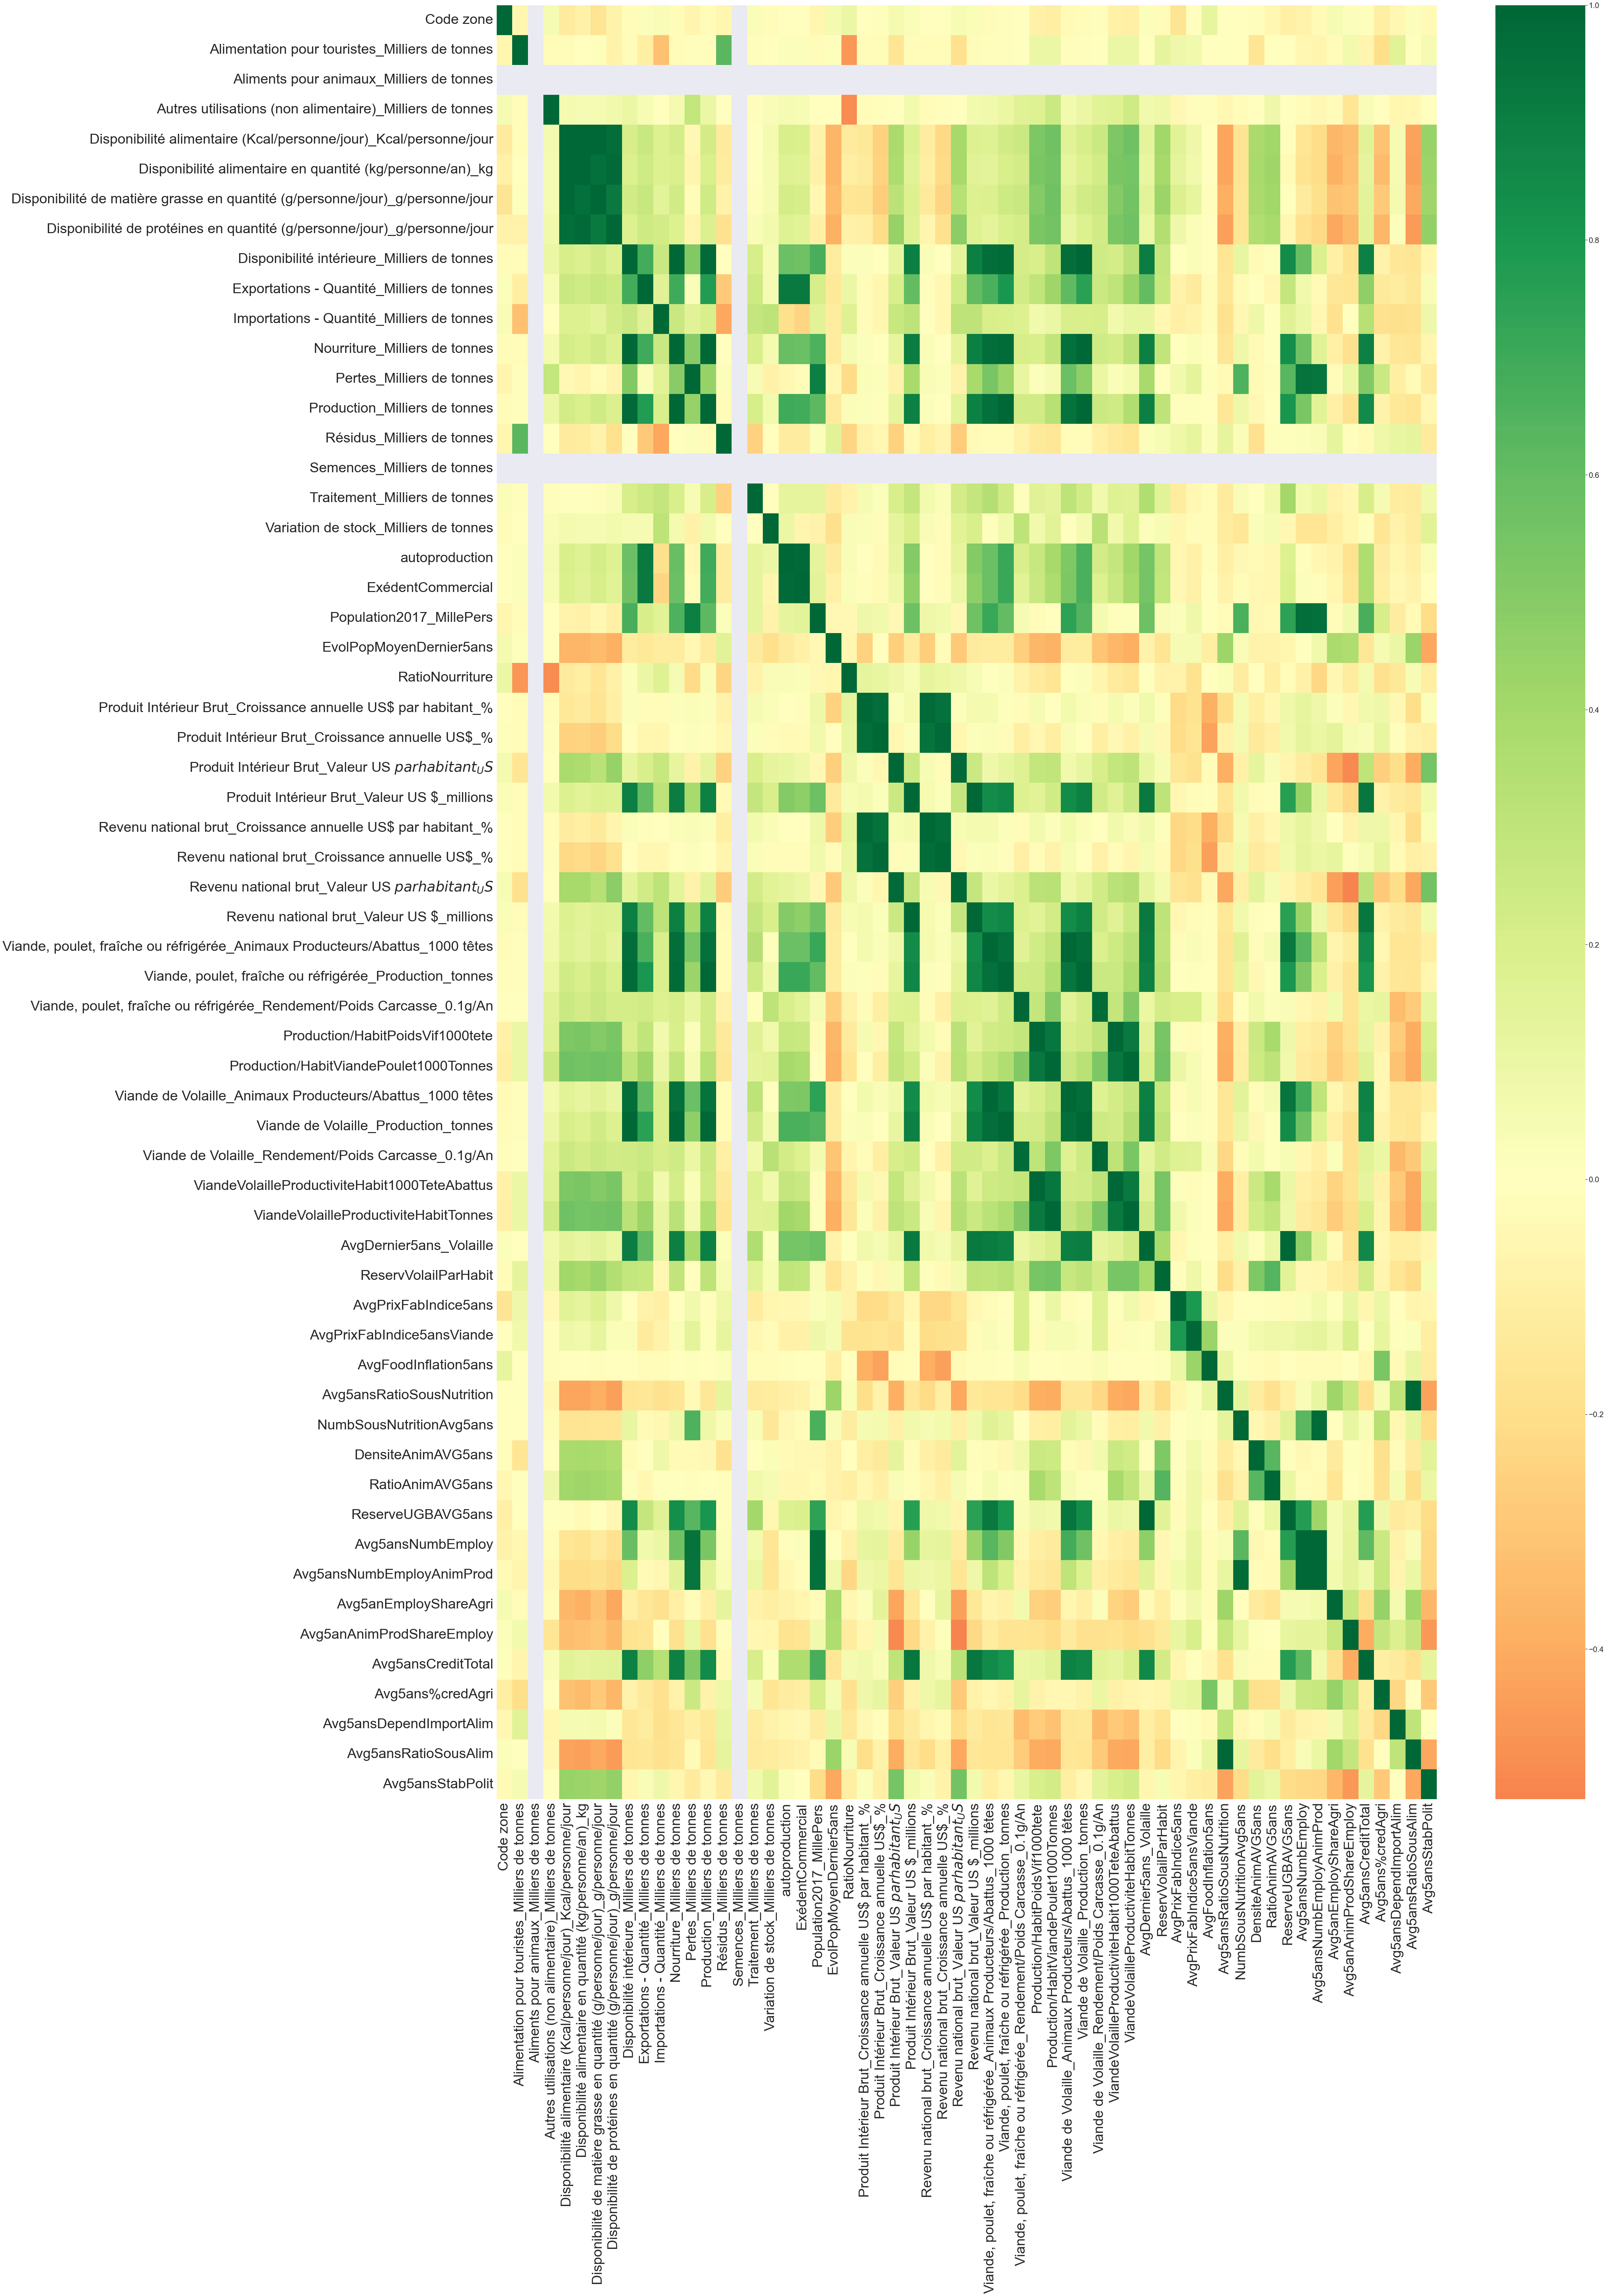

In [8]:
#Calculer les corrélations des colonnes
Tableau_corr=Tableau_resume.corr()

#Affichier les covariances par heatmap
sns.set(font_scale=2)
plt.figure(figsize=(60,94))

sns.heatmap(Tableau_corr,annot=False, center=0,cmap="RdYlGn")
plt.yticks(fontsize=40)
plt.xticks(fontsize=40)
plt.show()

# 5 Traitement des Valeurs manquantes
    -Supprimer les colonnes avec valeur unique 1
    -Supprimer les colonnes avec les valeurs manquantes > 10%
    -Supprimer les colonnes avec l'information en doublons
    -Remplir les valeurs vides restantes avec la moyenne de colonne

#### 5.1 Supprimer les colonnes non pertinentes

    -les 2 colonnes non pertinentes qu'on a identifé avec méthode .info()
            Aliments pour animaux_Milliers de tonnes  
            Semences_Milliers de tonnes
            
            
            
    -Toutes les variables avec un taux de valeur manquante > 10%
            'Avg5ans%credAgri',
            'Avg5anAnimProdShareEmploy',
            'Avg5ansNumbEmployAnimProd',
            'Avg5ansCreditTotal',
            'Avg5anEmployShareAgri',
            'AvgPrixFabIndice5ansViande',
            'AvgPrixFabIndice5ans',
            'Avg5ansNumbEmploy',
            'NumbSousNutritionAvg5ans'

In [9]:
#définir le liste des colonnes à supprimer
ColumnsSupprime=['Semences_Milliers de tonnes',
                 'Aliments pour animaux_Milliers de tonnes',
                 'Avg5ans%credAgri',
                 'Avg5anAnimProdShareEmploy',
                 'Avg5ansNumbEmployAnimProd',
                 'Avg5ansCreditTotal',
                 'Avg5anEmployShareAgri',
                 'AvgPrixFabIndice5ansViande',
                 'AvgPrixFabIndice5ans',
                 'Avg5ansNumbEmploy',
                 'NumbSousNutritionAvg5ans'
]

#Appliquer la suppression
Tableau_preselected = Tableau_resume.drop(ColumnsSupprime, axis=1)
Tableau_preselected.head(2)

Code zone         Zone  Alimentation pour touristes_Milliers de tonnes  \
0          1      Arménie                                             0.0   
1          2  Afghanistan                                             0.0   

   Autres utilisations (non alimentaire)_Milliers de tonnes  \
0                                                0.0          
1                                                0.0          

   Disponibilité alimentaire (Kcal/personne/jour)_Kcal/personne/jour  \
0                                               54.0                   
1                                                5.0                   

   Disponibilité alimentaire en quantité (kg/personne/an)_kg  \
0                                              16.06           
1                                               1.53           

   Disponibilité de matière grasse en quantité (g/personne/jour)_g/personne/jour  \
0                                               3.39                               
1                                               0.33                               

   Disponibilité de protéines en quantité (g/personne/jour)_g/personne/jour  \
0                                               5.44                          
1                                               0.54                          

   Disponibilité intérieure_Milliers de tonnes  \
0                                         47.0   
1                                         57.0   

   Exportations - Quantité_Milliers de tonnes  \
0                                         0.0   
1                                         0.0   

   Importations - Quantité_Milliers de tonnes  Nourriture_Milliers de tonnes  \
0                                        35.0                           47.0   
1                                        29.0                           55.0   

   Pertes_Milliers de tonnes  Production_Milliers de tonnes  \
0                        0.0                           11.0   
1                        2.0                           28.0   

   Résidus_Milliers de tonnes  Traitement_Milliers de tonnes  \
0                         0.0                            0.0   
1                         0.0                            0.0   

   Variation de stock_Milliers de tonnes  autoproduction  ExédentCommercial  \
0                                   -2.0           -36.0              -35.0   
1                                    0.0           -29.0              -29.0   

   Population2017_MillePers  EvolPopMoyenDernier5ans  RatioNourriture  \
0                  2944.791                 0.004048             1.00   
1                 36296.113                 0.029837             0.96   

   Produit Intérieur Brut_Croissance annuelle US$ par habitant_%  \
0                                           3.623866               
1                                          -1.266665               

   Produit Intérieur Brut_Croissance annuelle US$_%  \
0                                          3.889854   
1                                          1.194190   

   Produit Intérieur Brut_Valeur US $ par habitant_US$  \
0                                        4119.507922     
1                                         506.157240     

   Produit Intérieur Brut_Valeur US $_millions  \
0                                 12158.407415   
1                                 18806.502236   

   Revenu national brut_Croissance annuelle US$ par habitant_%  \
0                                           3.178911             
1                                          -1.255479             

   Revenu national brut_Croissance annuelle US$_%  \
0                                        3.443580   
1                                        1.205849   

   Revenu national brut_Valeur US $ par habitant_US$  \
0                                        4209.817743   
1                                         512.124190   

   Revenu national brut_Valeur US $_millions  \
0                         

#### 5.2 Traiter les 2 colonnes identique (venant de 2 sources) et Supprimer Avg5ansRatioSousNutrition

    Entre 2 colonnes identiques venant de différent ressource FAO, on va garder la colonne Avg5ansRatioSousAlim qui a moins de valeur manquante.
        'Avg5ansRatioSousAlim'
        'Avg5ansRatioSousNutrition'

##### Identifier les différences entre 2 colonnes
    
    Avg5ansRatioSousAlim a les informations les plus riches sauf qu'il manque les données d'1 pays 'Mozambique' que Avg5ansRatioSousNutrition
    Valeur ratio sous nutrition de Mozambique est 31.68

In [10]:

#Comparer la différence entre les pays sans valeurs dans Avg5ansRatioSousAlim et les pays sans valeurs dans Avg5ansRatioSousNutrition
SousAliVide=Tableau_preselected[Tableau_preselected['Avg5ansRatioSousAlim'].isna()==True].Zone
SousNuVide=Tableau_preselected[Tableau_preselected['Avg5ansRatioSousNutrition'].isna()==True].Zone
print('Zones pas connu de Avg5ansRatioSousAlim ',set(SousAliVide)-set(SousNuVide))

Zones pas connu de Avg5ansRatioSousAlim  {'Mozambique'}


In [11]:
#Vérifier la différence identifié
Tableau_preselected[Tableau_preselected.Zone=='Mozambique']

Code zone        Zone  Alimentation pour touristes_Milliers de tonnes  \
101        144  Mozambique                                             0.0   

     Autres utilisations (non alimentaire)_Milliers de tonnes  \
101                                                0.0          

     Disponibilité alimentaire (Kcal/personne/jour)_Kcal/personne/jour  \
101                                               13.0                   

     Disponibilité alimentaire en quantité (kg/personne/an)_kg  \
101                                               3.59           

     Disponibilité de matière grasse en quantité (g/personne/jour)_g/personne/jour  \
101                                               0.82                               

     Disponibilité de protéines en quantité (g/personne/jour)_g/personne/jour  \
101                                                1.2                          

     Disponibilité intérieure_Milliers de tonnes  \
101                                        116.0   

     Exportations - Quantité_Milliers de tonnes  \
101                                         0.0   

     Importations - Quantité_Milliers de tonnes  \
101                                        24.0   

     Nourriture_Milliers de tonnes  Pertes_Milliers de tonnes  \
101                          103.0                        4.0   

     Production_Milliers de tonnes  Résidus_Milliers de tonnes  \
101                           92.0                         0.0   

     Traitement_Milliers de tonnes  Variation de stock_Milliers de tonnes  \
101                            9.0                                   -1.0   

     autoproduction  ExédentCommercial  Population2017_MillePers  \
101           -24.0              -24.0                 28649.018   

     EvolPopMoyenDernier5ans  RatioNourriture  \
101                 0.028926             0.89   

     Produit Intérieur Brut_Croissance annuelle US$ par habitant_%  \
101                                           -4.27424               

     Produit Intérieur Brut_Croissance annuelle US$_%  \
101                                         -1.459474   

     Produit Intérieur Brut_Valeur US $ par habitant_US$  \
101                                         469.860867     

     Produit Intérieur Brut_Valeur US $_millions  \
101                                 13884.063134   

     Revenu national brut_Croissance annuelle US$ par habitant_%  \
101                                          -4.373517             

     Revenu national brut_Croissance annuelle US$_%  \
101                                       -1.561655   

     Revenu national brut_Valeur US $ par habitant_US$  \
101                                         460.180081   

     Revenu national brut_Valeur US $_millions  \
101                               13597.965857   

     Viande, poulet, fraîche ou réfrigérée_Animaux Producteurs/Abattus_1000 têtes  \
101                                            35387.8                              

     Viande, poulet, fraîche ou réfrigérée_Production_tonnes  \
101                                            97164.8         

     Viande, poulet, fraîche ou réfrigérée_Rendement/Poids Carcasse_0.1g/An  \
101                                            27595.4                        

     Production/HabitPoidsVif1000tete  Production/HabitViandePoulet1000Tonnes  \
101                          1.235219                                3.391558   

     Viande de Volaille_Animaux Producteurs/Abattus_1000 têtes  \
101                                            38160.4           

     Viande de Volaille_Production_tonnes  \
101                              100567.2   

     Viande de Volaille_Rendement/Poids Carcasse_0.1g/An  \
101                                            26450.2     

     ViandeVolailleProductiviteHabit1000TeteAbattus  \
101                                        1.331997   

     ViandeVolailleProductiviteHabitTonnes  AvgDernier5ans_Volaille  \
101                               3.

##### Récupérer les valeurs de Zone Mozambique dans Avg5ansRatioSousNutrition qui n'est pas connu de Avg5ansRatioSousAlim

In [12]:
#Remplir Avg5ansRatioSousAlim de Mozambique
Tableau_preselected.loc[Tableau_preselected.Zone=='Mozambique','Avg5ansRatioSousAlim'
                       ]=Tableau_preselected.loc[Tableau_preselected.Zone==
                                                 'Mozambique','Avg5ansRatioSousAlim'].fillna(31.68)

Tableau_preselected[Tableau_preselected.Zone=='Mozambique']

Code zone        Zone  Alimentation pour touristes_Milliers de tonnes  \
101        144  Mozambique                                             0.0   

     Autres utilisations (non alimentaire)_Milliers de tonnes  \
101                                                0.0          

     Disponibilité alimentaire (Kcal/personne/jour)_Kcal/personne/jour  \
101                                               13.0                   

     Disponibilité alimentaire en quantité (kg/personne/an)_kg  \
101                                               3.59           

     Disponibilité de matière grasse en quantité (g/personne/jour)_g/personne/jour  \
101                                               0.82                               

     Disponibilité de protéines en quantité (g/personne/jour)_g/personne/jour  \
101                                                1.2                          

     Disponibilité intérieure_Milliers de tonnes  \
101                                        116.0   

     Exportations - Quantité_Milliers de tonnes  \
101                                         0.0   

     Importations - Quantité_Milliers de tonnes  \
101                                        24.0   

     Nourriture_Milliers de tonnes  Pertes_Milliers de tonnes  \
101                          103.0                        4.0   

     Production_Milliers de tonnes  Résidus_Milliers de tonnes  \
101                           92.0                         0.0   

     Traitement_Milliers de tonnes  Variation de stock_Milliers de tonnes  \
101                            9.0                                   -1.0   

     autoproduction  ExédentCommercial  Population2017_MillePers  \
101           -24.0              -24.0                 28649.018   

     EvolPopMoyenDernier5ans  RatioNourriture  \
101                 0.028926             0.89   

     Produit Intérieur Brut_Croissance annuelle US$ par habitant_%  \
101                                           -4.27424               

     Produit Intérieur Brut_Croissance annuelle US$_%  \
101                                         -1.459474   

     Produit Intérieur Brut_Valeur US $ par habitant_US$  \
101                                         469.860867     

     Produit Intérieur Brut_Valeur US $_millions  \
101                                 13884.063134   

     Revenu national brut_Croissance annuelle US$ par habitant_%  \
101                                          -4.373517             

     Revenu national brut_Croissance annuelle US$_%  \
101                                       -1.561655   

     Revenu national brut_Valeur US $ par habitant_US$  \
101                                         460.180081   

     Revenu national brut_Valeur US $_millions  \
101                               13597.965857   

     Viande, poulet, fraîche ou réfrigérée_Animaux Producteurs/Abattus_1000 têtes  \
101                                            35387.8                              

     Viande, poulet, fraîche ou réfrigérée_Production_tonnes  \
101                                            97164.8         

     Viande, poulet, fraîche ou réfrigérée_Rendement/Poids Carcasse_0.1g/An  \
101                                            27595.4                        

     Production/HabitPoidsVif1000tete  Production/HabitViandePoulet1000Tonnes  \
101                          1.235219                                3.391558   

     Viande de Volaille_Animaux Producteurs/Abattus_1000 têtes  \
101                                            38160.4           

     Viande de Volaille_Production_tonnes  \
101                              100567.2   

     Viande de Volaille_Rendement/Poids Carcasse_0.1g/An  \
101                                            26450.2     

     ViandeVolailleProductiviteHabit1000TeteAbattus  \
101                                        1.331997   

     ViandeVolailleProductiviteHabitTonnes  AvgDernier5ans_Volaille  \
101                               3.

##### Suppromer colonne Avg5ansRatioSousNutrition

In [13]:
#Supprimer la colonne Avg5ansRatioSousNutrition
Tableau_preselected=Tableau_preselected.drop('Avg5ansRatioSousNutrition',axis=1)

#### 5.3 traitement de valeur vide (remplir avec méthode mean())

In [14]:
#Pour les valeurs vides restées, les remplir avec la valeur moyenne de colonne
Tableau_preselectedACP=Tableau_resume
Tableau_preselectedACP=Tableau_preselectedACP.set_index(['Code zone','Zone'])
Tableau_preselectedACP=Tableau_preselectedACP.fillna(Tableau_preselectedACP.mean())
Tableau_preselectedACP.isna().sum()

Alimentation pour touristes_Milliers de tonnes                                   0
Aliments pour animaux_Milliers de tonnes                                         0
Autres utilisations (non alimentaire)_Milliers de tonnes                         0
Disponibilité alimentaire (Kcal/personne/jour)_Kcal/personne/jour                0
Disponibilité alimentaire en quantité (kg/personne/an)_kg                        0
Disponibilité de matière grasse en quantité (g/personne/jour)_g/personne/jour    0
Disponibilité de protéines en quantité (g/personne/jour)_g/personne/jour         0
Disponibilité intérieure_Milliers de tonnes                                      0
Exportations - Quantité_Milliers de tonnes                                       0
Importations - Quantité_Milliers de tonnes                                       0
Nourriture_Milliers de tonnes                                                    0
Pertes_Milliers de tonnes                                                        0
Prod

# 6. Traiter outliers avec ISOFOREST
    Avec 5% de Ouliers on enlève 9 pays avec les valeurs extrêmes, dont HONG KONG et JAPON (outliers en importation) devront être rajouté à la fin d'étude.

#### 6.1 Importer isolation forest et Donnée une marge d'erreur de 5%
    Avec plusieurs estimations, le marge d'erreur de 5% est le mieux adapté

In [15]:
TableauS1_SansOutliersBIS=Tableau_preselectedACP
from sklearn.ensemble import IsolationForest
isoforest = IsolationForest(random_state=123,contamination = 0.05)
isoforest.fit(TableauS1_SansOutliersBIS)

IsolationForest(contamination=0.05, random_state=123)

#### 6.2 Affichier les outliers détactés avec 5% de marque d'erreur

    Les 9 outliers identifiés:
    'Argentine' 'Brésil' 'Chine, continentale' 'Chine - RAS de Hong-Kong'
     'Inde' 'Indonésie' 'Israël' 'Japon' "États-Unis d'Amérique"
     
    
    ce sont les pays 
    qui sont les outliers dans la population comme chine,l'inde, Etats Units, Indonésie. 
    qui sont outliers dans la production est Exportante importante comme Etats-Units et Brésil.
    qui sont outliers dans l'importation importante comme Hongkong et Japon.
    qui sont les outliers comme Argentine, Istaël
    
    Ces 9 pays sont connu en valeur extreme dans les boxplots de l'analyse exploratoire.
    Japon et Hongkong sont les 2 outliers en importation, on va les intégrer dans le liste des pays cibles à la fin de l'étude.

In [16]:
#Intégrer la prédiction de isoforest dans le tableau
TableauS1_SansOutliersBIS['Outlier']=isoforest.predict(TableauS1_SansOutliersBIS)

TableauS1_SansOutliersBIS.head()
#Affichier les pays outliers identifié par isoforest
Donnee_outliers=TableauS1_SansOutliersBIS[TableauS1_SansOutliersBIS['Outlier']==-1]

print('Il y a',len(Donnee_outliers.reset_index().Zone.unique()),'Outliers détectés avec 5% marge d\'erreur','Les Zones Outliers sont:',Donnee_outliers.reset_index().Zone.unique())
display(Donnee_outliers.head(2))


Il y a 9 Outliers détectés avec 5% marge d'erreur Les Zones Outliers sont: ['Argentine' 'Brésil' 'Chine, continentale' 'Chine - RAS de Hong-Kong'
 'Inde' 'Indonésie' 'Israël' 'Japon' "États-Unis d'Amérique"]


Alimentation pour touristes_Milliers de tonnes  \
Code zone Zone                                                        
9         Argentine                                             0.0   
21        Brésil                                                0.0   

                     Aliments pour animaux_Milliers de tonnes  \
Code zone Zone                                                  
9         Argentine                                       0.0   
21        Brésil                                          0.0   

                     Autres utilisations (non alimentaire)_Milliers de tonnes  \
Code zone Zone                                                                  
9         Argentine                                                0.0          
21        Brésil                                                   0.0          

                     Disponibilité alimentaire (Kcal/personne/jour)_Kcal/personne/jour  \
Code zone Zone                                                                           
9         Argentine                                              182.0                   
21        Brésil                                                 204.0                   

                     Disponibilité alimentaire en quantité (kg/personne/an)_kg  \
Code zone Zone                                                                   
9         Argentine                                              42.24           
21        Brésil                                                 48.03           

                     Disponibilité de matière grasse en quantité (g/personne/jour)_g/personne/jour  \
Code zone Zone                                                                                       
9         Argentine                                              13.84                               
21        Brésil                                                 15.34                               

                     Disponibilité de protéines en quantité (g/personne/jour)_g/personne/jour  \
Code zone Zone                                                                                  
9         Argentine                                              13.53                          
21        Brésil                                                 15.68                          

                     Disponibilité intérieure_Milliers de tonnes  \
Code zone Zone                                                     
9         Argentine                                       1962.0   
21        Brésil                                          9982.0   

                     Exportations - Quantité_Milliers de tonnes  \
Code zone Zone                                                    
9         Argentine                                       207.0   
21        Brésil                                         4223.0   

                     Importations - Quantité_Milliers de tonnes  \
Code zone Zone                                                    
9         Argentine                                         8.0   
21        Brésil                                            3.0   

                     Nourriture_Milliers de tonnes  Pertes_Milliers de tonnes  \
Code zone Zone                                                                  
9         Argentine                         1856.0                      106.0   
21        Brésil                            9982.0                        0.0   

                     Production_Milliers de tonnes  \
Code zone Zone                                       
9         Argentine                         2161.0   
21        Brésil                           14201.0   

                     Résidus_Milliers de tonnes  Semences_Milliers de tonnes  \
Code zone Zone                                                                 
9         Argentine                         0.0                          0.0   
21        Brésil                           -0.0                      

#### 6.3 Construire le tableau sans outliers
    Il reste 163 pays après la suppression de outiliers.

In [17]:
#Etablir le tableau sans outliers
TableauS1SansOutliers=TableauS1_SansOutliersBIS[TableauS1_SansOutliersBIS['Outlier']==1]
print('Nombre de lignes dans le tableau d\'origine:',len(Tableau_resume.reset_index().Zone))
print('Nombre de lignes dans Nouveau tableau:',len(TableauS1SansOutliers.reset_index().Zone))
print('les différences entre le nouveau tableau et le tableau d\'origine:',set(Tableau_resume.reset_index().Zone)-set(TableauS1SansOutliers.reset_index().Zone))

display(TableauS1SansOutliers.head(2))  

Nombre de lignes dans le tableau d'origine: 172
Nombre de lignes dans Nouveau tableau: 163
les différences entre le nouveau tableau et le tableau d'origine: {'Chine - RAS de Hong-Kong', 'Indonésie', 'Japon', 'Brésil', 'Argentine', 'Israël', "États-Unis d'Amérique", 'Chine, continentale', 'Inde'}


Alimentation pour touristes_Milliers de tonnes  \
Code zone Zone                                                          
1         Arménie                                                 0.0   
2         Afghanistan                                             0.0   

                       Aliments pour animaux_Milliers de tonnes  \
Code zone Zone                                                    
1         Arménie                                           0.0   
2         Afghanistan                                       0.0   

                       Autres utilisations (non alimentaire)_Milliers de tonnes  \
Code zone Zone                                                                    
1         Arménie                                                    0.0          
2         Afghanistan                                                0.0          

                       Disponibilité alimentaire (Kcal/personne/jour)_Kcal/personne/jour  \
Code zone Zone                                                                             
1         Arménie                                                   54.0                   
2         Afghanistan                                                5.0                   

                       Disponibilité alimentaire en quantité (kg/personne/an)_kg  \
Code zone Zone                                                                     
1         Arménie                                                  16.06           
2         Afghanistan                                               1.53           

                       Disponibilité de matière grasse en quantité (g/personne/jour)_g/personne/jour  \
Code zone Zone                                                                                         
1         Arménie                                                   3.39                               
2         Afghanistan                                               0.33                               

                       Disponibilité de protéines en quantité (g/personne/jour)_g/personne/jour  \
Code zone Zone                                                                                    
1         Arménie                                                   5.44                          
2         Afghanistan                                               0.54                          

                       Disponibilité intérieure_Milliers de tonnes  \
Code zone Zone                                                       
1         Arménie                                             47.0   
2         Afghanistan                                         57.0   

                       Exportations - Quantité_Milliers de tonnes  \
Code zone Zone                                                      
1         Arménie                                             0.0   
2         Afghanistan                                         0.0   

                       Importations - Quantité_Milliers de tonnes  \
Code zone Zone                                                      
1         Arménie                                            35.0   
2         Afghanistan                                        29.0   

                       Nourriture_Milliers de tonnes  \
Code zone Zone                                         
1         Arménie                               47.0   
2         Afghanistan                           55.0   

                       Pertes_Milliers de tonnes  \
Code zone Zone                                     
1         Arménie                            0.0   
2         Afghanistan                        2.0   

                       Production_Milliers de tonnes  \
Code zone Zone                                         
1         Arménie                               11.0   
2         Afghanistan                           28.0   

                       Résidus_Milliers de tonnes  \
Code zone Zone                                      
1       

# 7. Centrée et Réduit les données avant ACP

#### 7.1 supprimer la colonne 'Outlier' donné par ISOFOREST

In [18]:
#Supprimer la prédiction de isoforest dans le tableau sans outliers
TableauS1SansOutliers.drop('Outlier',axis=1,inplace=True)

In [19]:
TableauS1SansOutliers.head(2)

Alimentation pour touristes_Milliers de tonnes  \
Code zone Zone                                                          
1         Arménie                                                 0.0   
2         Afghanistan                                             0.0   

                       Aliments pour animaux_Milliers de tonnes  \
Code zone Zone                                                    
1         Arménie                                           0.0   
2         Afghanistan                                       0.0   

                       Autres utilisations (non alimentaire)_Milliers de tonnes  \
Code zone Zone                                                                    
1         Arménie                                                    0.0          
2         Afghanistan                                                0.0          

                       Disponibilité alimentaire (Kcal/personne/jour)_Kcal/personne/jour  \
Code zone Zone                                                                             
1         Arménie                                                   54.0                   
2         Afghanistan                                                5.0                   

                       Disponibilité alimentaire en quantité (kg/personne/an)_kg  \
Code zone Zone                                                                     
1         Arménie                                                  16.06           
2         Afghanistan                                               1.53           

                       Disponibilité de matière grasse en quantité (g/personne/jour)_g/personne/jour  \
Code zone Zone                                                                                         
1         Arménie                                                   3.39                               
2         Afghanistan                                               0.33                               

                       Disponibilité de protéines en quantité (g/personne/jour)_g/personne/jour  \
Code zone Zone                                                                                    
1         Arménie                                                   5.44                          
2         Afghanistan                                               0.54                          

                       Disponibilité intérieure_Milliers de tonnes  \
Code zone Zone                                                       
1         Arménie                                             47.0   
2         Afghanistan                                         57.0   

                       Exportations - Quantité_Milliers de tonnes  \
Code zone Zone                                                      
1         Arménie                                             0.0   
2         Afghanistan                                         0.0   

                       Importations - Quantité_Milliers de tonnes  \
Code zone Zone                                                      
1         Arménie                                            35.0   
2         Afghanistan                                        29.0   

                       Nourriture_Milliers de tonnes  \
Code zone Zone                                         
1         Arménie                               47.0   
2         Afghanistan                           55.0   

                       Pertes_Milliers de tonnes  \
Code zone Zone                                     
1         Arménie                            0.0   
2         Afghanistan                        2.0   

                       Production_Milliers de tonnes  \
Code zone Zone                                         
1         Arménie                               11.0   
2         Afghanistan                           28.0   

                       Résidus_Milliers de tonnes  \
Code zone Zone                                      
1       

#### 7.2 Importer StandardScaler Centrée et réduit les données 

In [20]:

#Centrée et réduit les données de tableau  sans outliers avec StandardScaler de sklearn
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Tableau_preselectedACP_SCAL=scaler.fit_transform(TableauS1SansOutliers)
Tableau_preselectedACP_SCAL = pd.DataFrame(Tableau_preselectedACP_SCAL, columns=TableauS1SansOutliers.columns)
Tableau_preselectedACP_SCAL.head(2)

Alimentation pour touristes_Milliers de tonnes  \
0                                       -0.255101   
1                                       -0.255101   

   Aliments pour animaux_Milliers de tonnes  \
0                                       0.0   
1                                       0.0   

   Autres utilisations (non alimentaire)_Milliers de tonnes  \
0                                          -0.123246          
1                                          -0.123246          

   Disponibilité alimentaire (Kcal/personne/jour)_Kcal/personne/jour  \
0                                          -0.304195                   
1                                          -1.167289                   

   Disponibilité alimentaire en quantité (kg/personne/an)_kg  \
0                                          -0.226209           
1                                          -1.197072           

   Disponibilité de matière grasse en quantité (g/personne/jour)_g/personne/jour  \
0                                          -0.325088                               
1                                          -1.098251                               

   Disponibilité de protéines en quantité (g/personne/jour)_g/personne/jour  \
0                                          -0.266815                          
1                                          -1.216057                          

   Disponibilité intérieure_Milliers de tonnes  \
0                                    -0.466557   
1                                    -0.451833   

   Exportations - Quantité_Milliers de tonnes  \
0                                    -0.29621   
1                                    -0.29621   

   Importations - Quantité_Milliers de tonnes  Nourriture_Milliers de tonnes  \
0                                   -0.270020                      -0.455856   
1                                   -0.307936                      -0.443603   

   Pertes_Milliers de tonnes  Production_Milliers de tonnes  \
0                  -0.253279                      -0.509204   
1                  -0.188671                      -0.483504   

   Résidus_Milliers de tonnes  Semences_Milliers de tonnes  \
0                    0.216469                          0.0   
1                    0.216469                          0.0   

   Traitement_Milliers de tonnes  Variation de stock_Milliers de tonnes  \
0                      -0.254582                              -0.326856   
1                      -0.254582                              -0.270980   

   autoproduction  ExédentCommercial  Population2017_MillePers  \
0       -0.103246          -0.051301                 -0.560948   
1       -0.067054          -0.017897                  0.408821   

   EvolPopMoyenDernier5ans  RatioNourriture  \
0                -0.775729         0.531862   
1                 1.347743         0.150792   

   Produit Intérieur Brut_Croissance annuelle US$ par habitant_%  \
0                                           0.575130               
1                                          -0.600262               

   Produit Intérieur Brut_Croissance annuelle US$_%  \
0                                          0.340261   
1                                         -0.316640   

   Produit Intérieur Brut_Valeur US $ par habitant_US$  \
0                                          -0.492670     
1                                          -0.682011     

   Produit Intérieur Brut_Valeur US $_millions  \
0                                    -0.415553   
1                                    -0.402736   

   Revenu national brut_Croissance annuelle US$ par habitant_%  \
0                                           0.488752             
1                                          -0.545037             

   Revenu national brut_Croissance annuelle US$_%  \
0                                        0.262065   
1                                       -0.270303   

   Revenu national brut_Valeur US $ par habitant_US$  \
0             

# 8. Réduction de la dimension avec ACP

    -Identifier le nombre de composants principaux optimal (95% d'information origine)
        23 composants principaux explique 95% des informations initiales
    
    -Etudier Visualiser les corrélations des variables par rapport aux 2 premiers composants principaux de ACP avec le cercle de corrélation.
    
    -Etudier et Visualiser la relation entre les individus et les 2 premiers composants principaux de ACP avec biplot.

#### 8.1 Identifier le nombre de composants principaux optimal

##### Vérifier le nombre de variables de tableau déjà centré réduit
      Il y a 59 variable avant d'appliquer ACP

In [21]:

len(Tableau_preselectedACP_SCAL.columns)

59

##### Importer ACP et Entrainer le tableau déjà centré et reduit

In [22]:
#Import ACP et entrainner le tableau déjà centrée et reduit
from sklearn import decomposition
model_presel=decomposition.PCA()
df_presel=model_presel.fit(Tableau_preselectedACP_SCAL)
score_presel=model_presel.transform(Tableau_preselectedACP_SCAL)

##### Affichier les ratios de variance et ses cumsum ACP

In [23]:
#Affichier le ratio explicative des composants pricipaux
model_presel.explained_variance_ratio_

array([2.28304826e-01, 1.46789761e-01, 8.72327523e-02, 7.57274762e-02,
       5.90712711e-02, 4.47583671e-02, 3.42370324e-02, 3.19530754e-02,
       3.09128126e-02, 2.73096325e-02, 2.48671774e-02, 2.12857278e-02,
       1.93727133e-02, 1.73704591e-02, 1.67788493e-02, 1.60847957e-02,
       1.40470761e-02, 1.21343350e-02, 1.11282306e-02, 9.48283465e-03,
       8.98168865e-03, 8.53482265e-03, 7.49935930e-03, 6.74607608e-03,
       5.80328448e-03, 5.72494749e-03, 4.88843001e-03, 4.77238881e-03,
       3.45878675e-03, 2.73661353e-03, 2.43027359e-03, 1.87658988e-03,
       1.56984185e-03, 1.12120888e-03, 1.11024227e-03, 7.91411493e-04,
       7.02049837e-04, 5.88699635e-04, 5.05448369e-04, 4.33722941e-04,
       2.92143295e-04, 1.87514983e-04, 1.69227222e-04, 7.13850113e-05,
       7.07668306e-05, 4.85462781e-05, 2.20831052e-05, 7.46710054e-06,
       3.11709828e-06, 1.81776054e-06, 4.57785467e-07, 2.91982412e-07,
       8.15024925e-08, 5.40989874e-09, 2.75618411e-09, 4.50251879e-32,
      

In [24]:
#Calculer cumsum de ratio explicatif des composants principaux, on trouve 95% à partir de 23ième CP
model_presel.explained_variance_ratio_.cumsum()

array([0.22830483, 0.37509459, 0.46232734, 0.53805482, 0.59712609,
       0.64188445, 0.67612149, 0.70807456, 0.73898737, 0.76629701,
       0.79116418, 0.81244991, 0.83182262, 0.84919308, 0.86597193,
       0.88205673, 0.89610381, 0.90823814, 0.91936637, 0.92884921,
       0.93783089, 0.94636572, 0.95386508, 0.96061115, 0.96641444,
       0.97213938, 0.97702781, 0.9818002 , 0.98525899, 0.9879956 ,
       0.99042588, 0.99230247, 0.99387231, 0.99499352, 0.99610376,
       0.99689517, 0.99759722, 0.99818592, 0.99869137, 0.99912509,
       0.99941724, 0.99960475, 0.99977398, 0.99984536, 0.99991613,
       0.99996468, 0.99998676, 0.99999423, 0.99999734, 0.99999916,
       0.99999962, 0.99999991, 0.99999999, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

##### Visualiser le ratio cumsum des composants principaux dans un graphique pour identifier le nombre de composant qui permet de conserver 95% des informations de tableau initial
    Avec 23 composants, nous pouvons garder 95% des informations initiales.

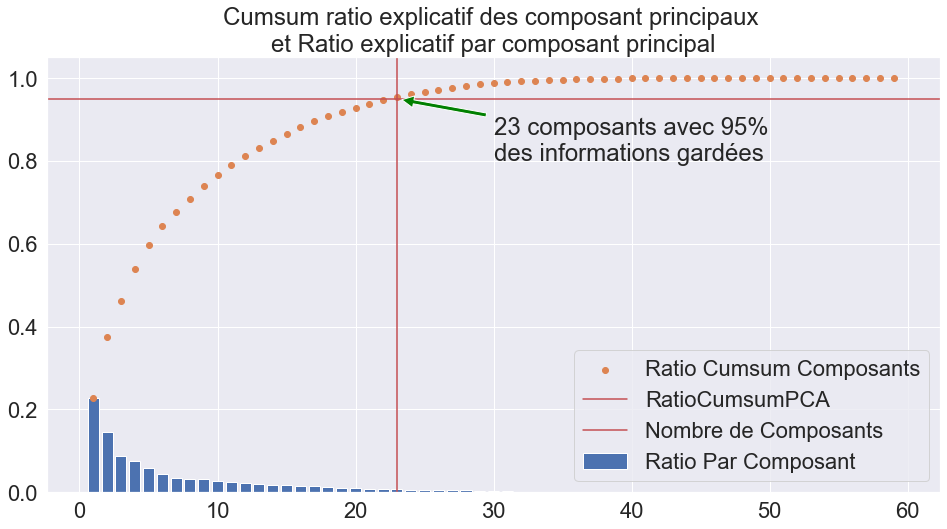

In [25]:
plt.figure(figsize=(16,8))
#Affichier ratio explicatif de chaque CP
plt.bar(range(1,60),model_presel.explained_variance_ratio_,label ='Ratio Par Composant')
#Affichier le ratio cumsum des CP
plt.scatter(range(1,60),model_presel.explained_variance_ratio_.cumsum(), marker='o',label='Ratio Cumsum Composants')
#Identifier le CP qui explique 95% de l'information
plt.axhline(0.95, label ='RatioCumsumPCA', color ='r')
plt.axvline(23, label ='Nombre de Composants', color ='r')

plt.annotate('23 composants avec 95% \ndes informations gardées', xy =(23, 0.95),
                xytext =(30, 0.8), 
                arrowprops = dict(facecolor ='green',
                                  shrink = 0.05),)
plt.title('Cumsum ratio explicatif des composant principaux \net Ratio explicatif par composant principal')
plt.legend()
plt.show()

#### 8.2 Visualiser circle de la corrélation ACP et Identifier les relations entre les variables
    Dans le circle de corrélation de ACP, nous trouvons les items de 2 axes principales
    
    Composant Principal 1 montre les critères des pays riches et développé
    
    Axe principal 1, il est corrélé positivement avec les colonnes de les variales liés à production, à la disponibilité intérieur,PIB et Revenu total, Croissance de PIB et Revenu par habitant, disponibilité alimentaire
    
    Axe principal 1, il est corrélé négativement et faiblement avec Dépendance alimentaire à l'importation, Evolution d'emplois, Evolution Sous Nutrition, Evolution Population
    
    
    Composant Principale 2 montre le niveau de sécurité alimentaire, emplois agriculture, et les facteurs qui le impactent.
    
    Axe principal 2, il est corrélé Positivement avec l'employement, la population, le peuple sous nutrition,Croissance de PIB et Revenue
    Axe principal 2, il est corrélé négativement avec les disponibilités alimentaires, la stabilité politique, PIB et Revenu total
    
    
#### En conclusion:
    Zone A, les pays sont plus productifs et populé, avec l'empois agriculture importante, qui sont en voie de développement.
    La dépendance alimentaition à l'importation est important.

    Zone B, les pays le moins développé, pauvres, avec un niveau de sous nutrition importante, la disponibilité alimentaire faible
    l'environnement politique moins stable mais ils sont en croissance vite en population et également en PIB et Revenu.
    La dépendance alimentaition à l'importation est forte.

    Zone C, les pays sont développé, riche, disponibilité d'alimentaire haute, Rentabilité de production haute, mais la croissance économique et     de la population ralenties, Emplois agriculture faible.
    La dépendance alimentaition à l'importation est faible.
    
    
    Zone D, les pays moins peuplé, d'il y a moins de production. Leur dépendance d'importation pour l'alimentation est important.
    Mais il importe moins les volailles.
    Plus il proche de CP2, plus il est riche et avec un environnement politique stable
    plus il est proche de CP1, plus il est modestre en PIB et revenu.

    

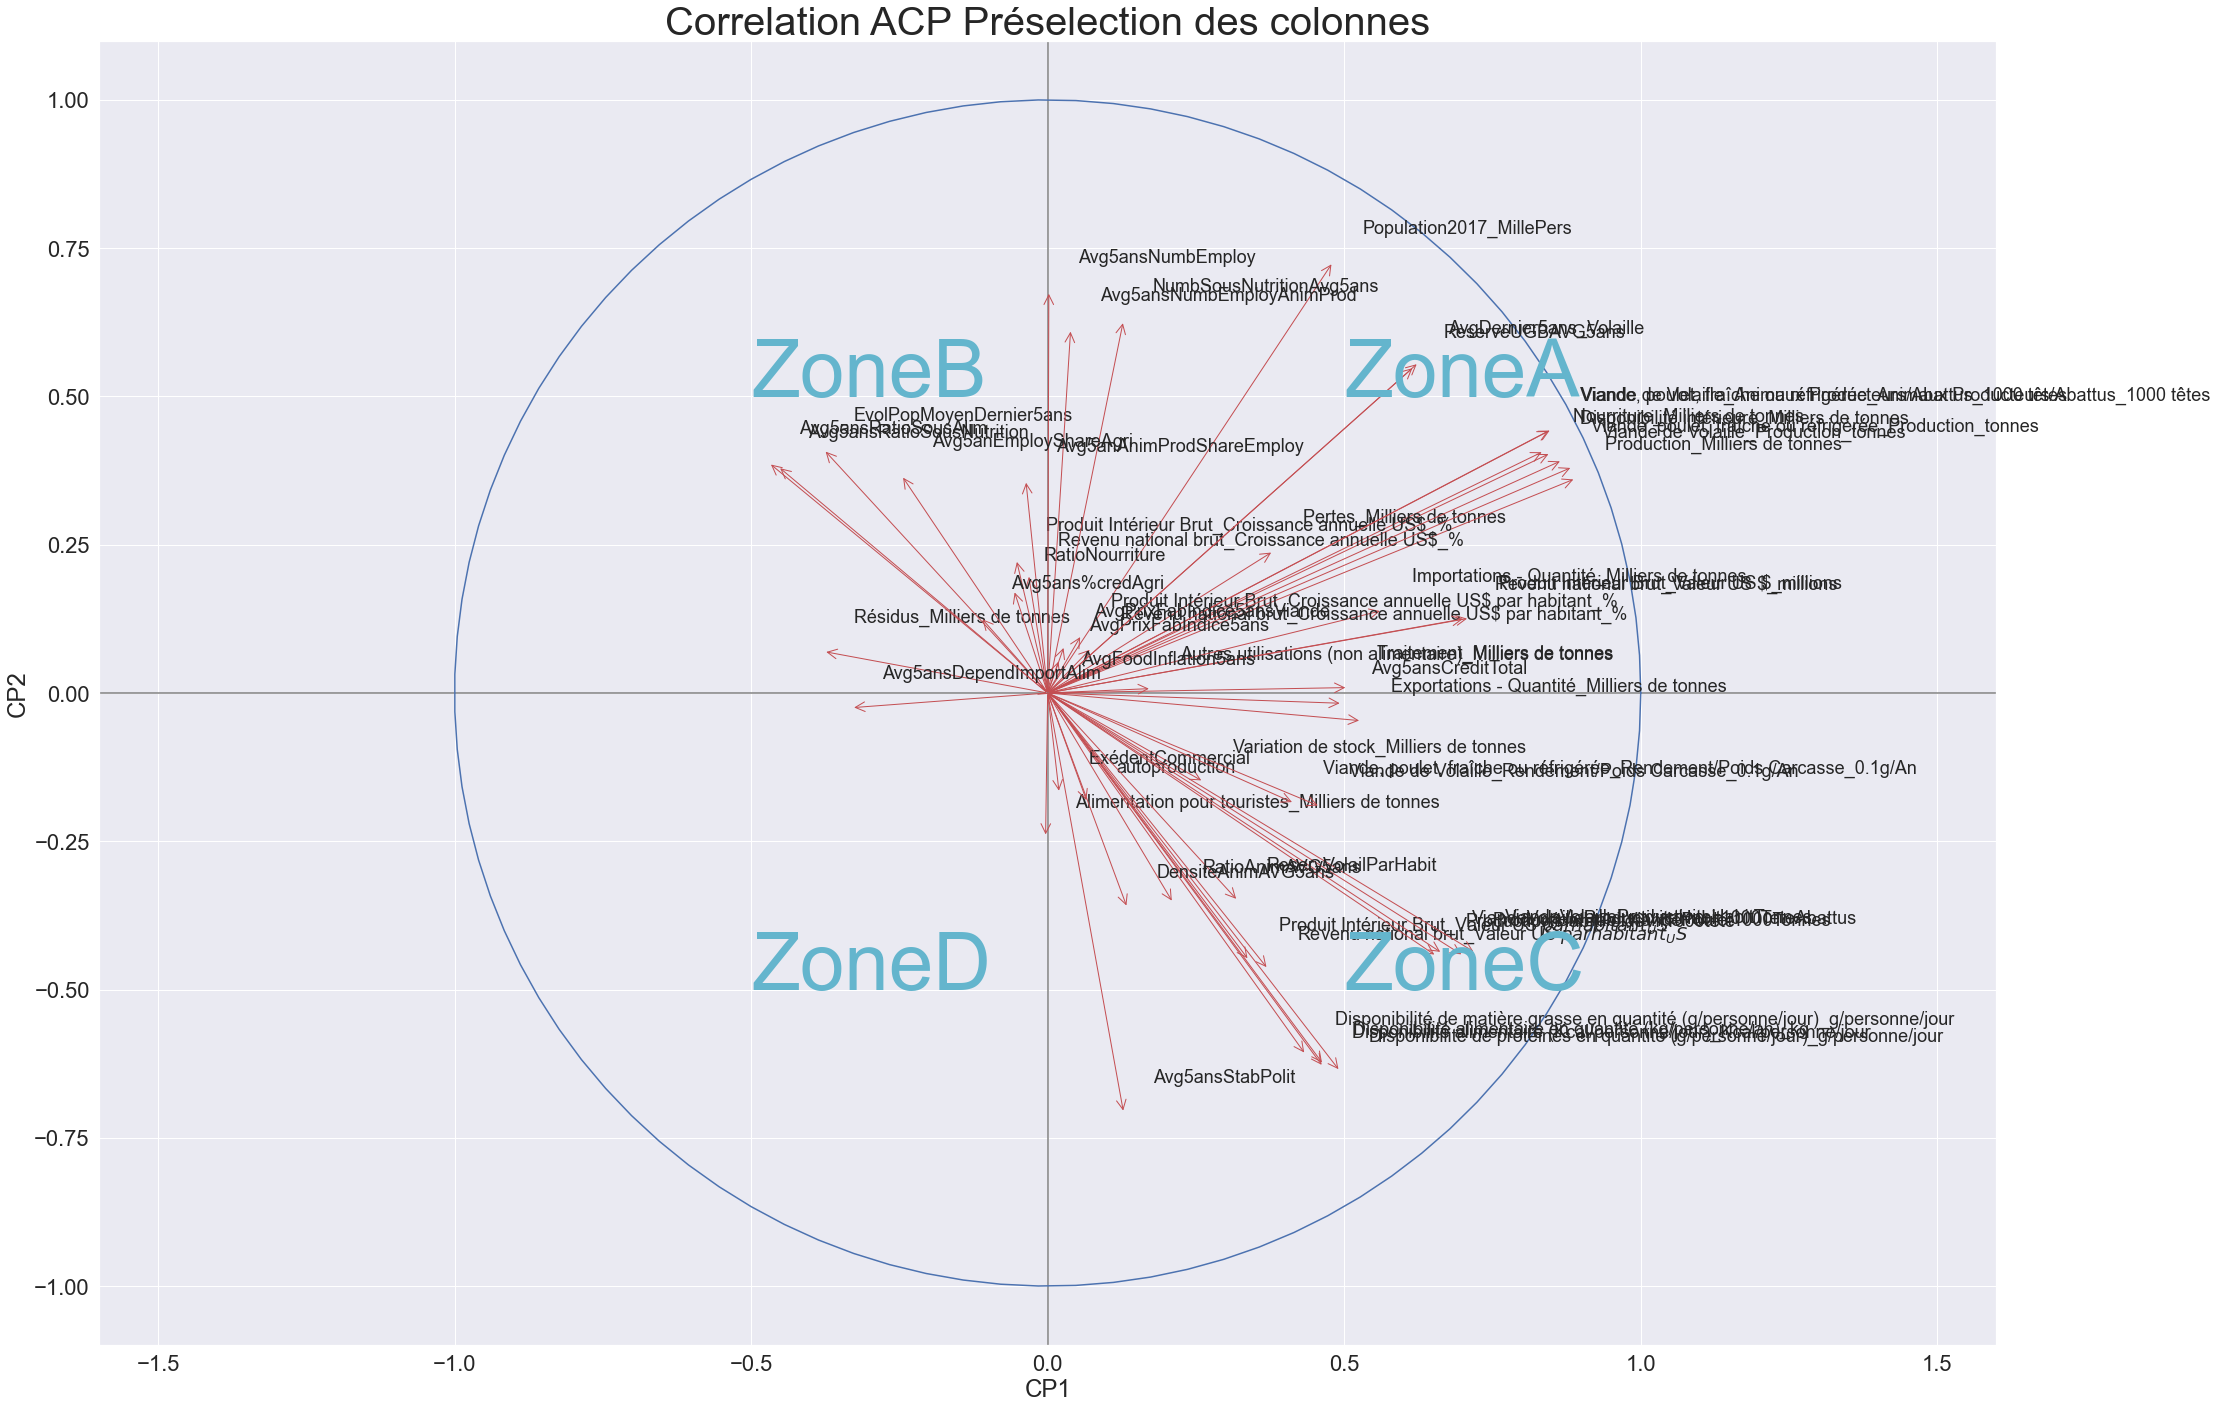

In [26]:
fig, ax = plt.subplots(figsize=(34, 24))

for i in range(Tableau_preselectedACP_SCAL.shape[1]):
    #Affichier la position de chaque variable
    x = np.corrcoef(score_presel[:,0],Tableau_preselectedACP_SCAL[Tableau_preselectedACP_SCAL.columns[i]])[0,1]
    y = np.corrcoef(score_presel[:,1],Tableau_preselectedACP_SCAL[Tableau_preselectedACP_SCAL.columns[i]])[0,1]
    #Ajouter l'arrow pour chaque variable
    ax.annotate("", xy= (x,y), xytext=(0, 0),arrowprops=dict(arrowstyle="->",color="r"))
    #Ajouter nom des variables
    ax.annotate(Tableau_preselectedACP_SCAL.columns[i], (x+0.05,y+0.05), size=18)


ax.set_title('Correlation ACP Préselection des colonnes',fontsize=40)
plt.xlabel('CP1')
plt.ylabel('CP2')

#Nommer les 4 zones
plt.annotate('ZoneA',(0.50,0.50),size=80,color='c')
plt.annotate('ZoneB',(-0.50,0.50),size=80,color='c')
plt.annotate('ZoneC',(0.50,-0.50),size=80,color='c')
plt.annotate('ZoneD',(-0.50,-0.50),size=80,color='c')
#Formater les axes 0
ax.axhline(y=0, color="grey", linestyle="-")
ax.axvline(x=0, color="grey", linestyle="-")

#Affichier le circle

sphere = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(sphere), np.sin(sphere))
plt.axis('equal')
plt.show()

#### 8.3 Relations entre les Pays et les variables avec biplot
    

In [27]:

# La fonction est pour réaliser biplot de ACP


def biplot(score,coef,labels=None):

    #Définir le taille de graphique
    fig, ax = plt.subplots(figsize=(34, 24))
    plt.title('Biplot of PCA')
    
    #Sélectionner 2 premiers composants principaux
    cp1 = score[:,0]
    cp2 = score[:,1]
    n = coef.shape[0]
    scalecp1 = 1.0/(cp1.max() - cp1.min())
    scalecp2 = 1.0/(cp2.max() - cp2.min())
    
    
    #Affichier la position de chaque pays
    plt.scatter(cp1 * scalecp1,
                cp2 * scalecp2,
                s=100, 
                color='red')
    
    #Formater axes 0
    plt.axhline(y=0, color="grey", linestyle="-")
    plt.axvline(x=0, color="grey", linestyle="-")
    #Définir 4 Zone
    plt.annotate('ZoneA',(0.50,0.40),size=80,color='c')
    plt.annotate('ZoneB',(-0.20,0.40),size=80,color='c')
    plt.annotate('ZoneC',(0.50,-0.40),size=80,color='c')
    plt.annotate('ZoneD',(-0.20,-0.40),size=80,color='c')
    
    #Visualier les variables
    for i in range(n):
        plt.arrow(0, 0, coef[i,0], 
                  coef[i,1],color = 'purple',
                  width = 0.001,
                  alpha = 0.5)
        plt.text(coef[i,0]*1.5, 
                 coef[i,1]*1.5, 
                 labels[i], 
                 color = 'grey', 
                 ha = 'center', 
                 va = 'center')
 
    plt.xlabel("CP{}".format(1))
    plt.ylabel("CP{}".format(2))    

 
    plt.show()

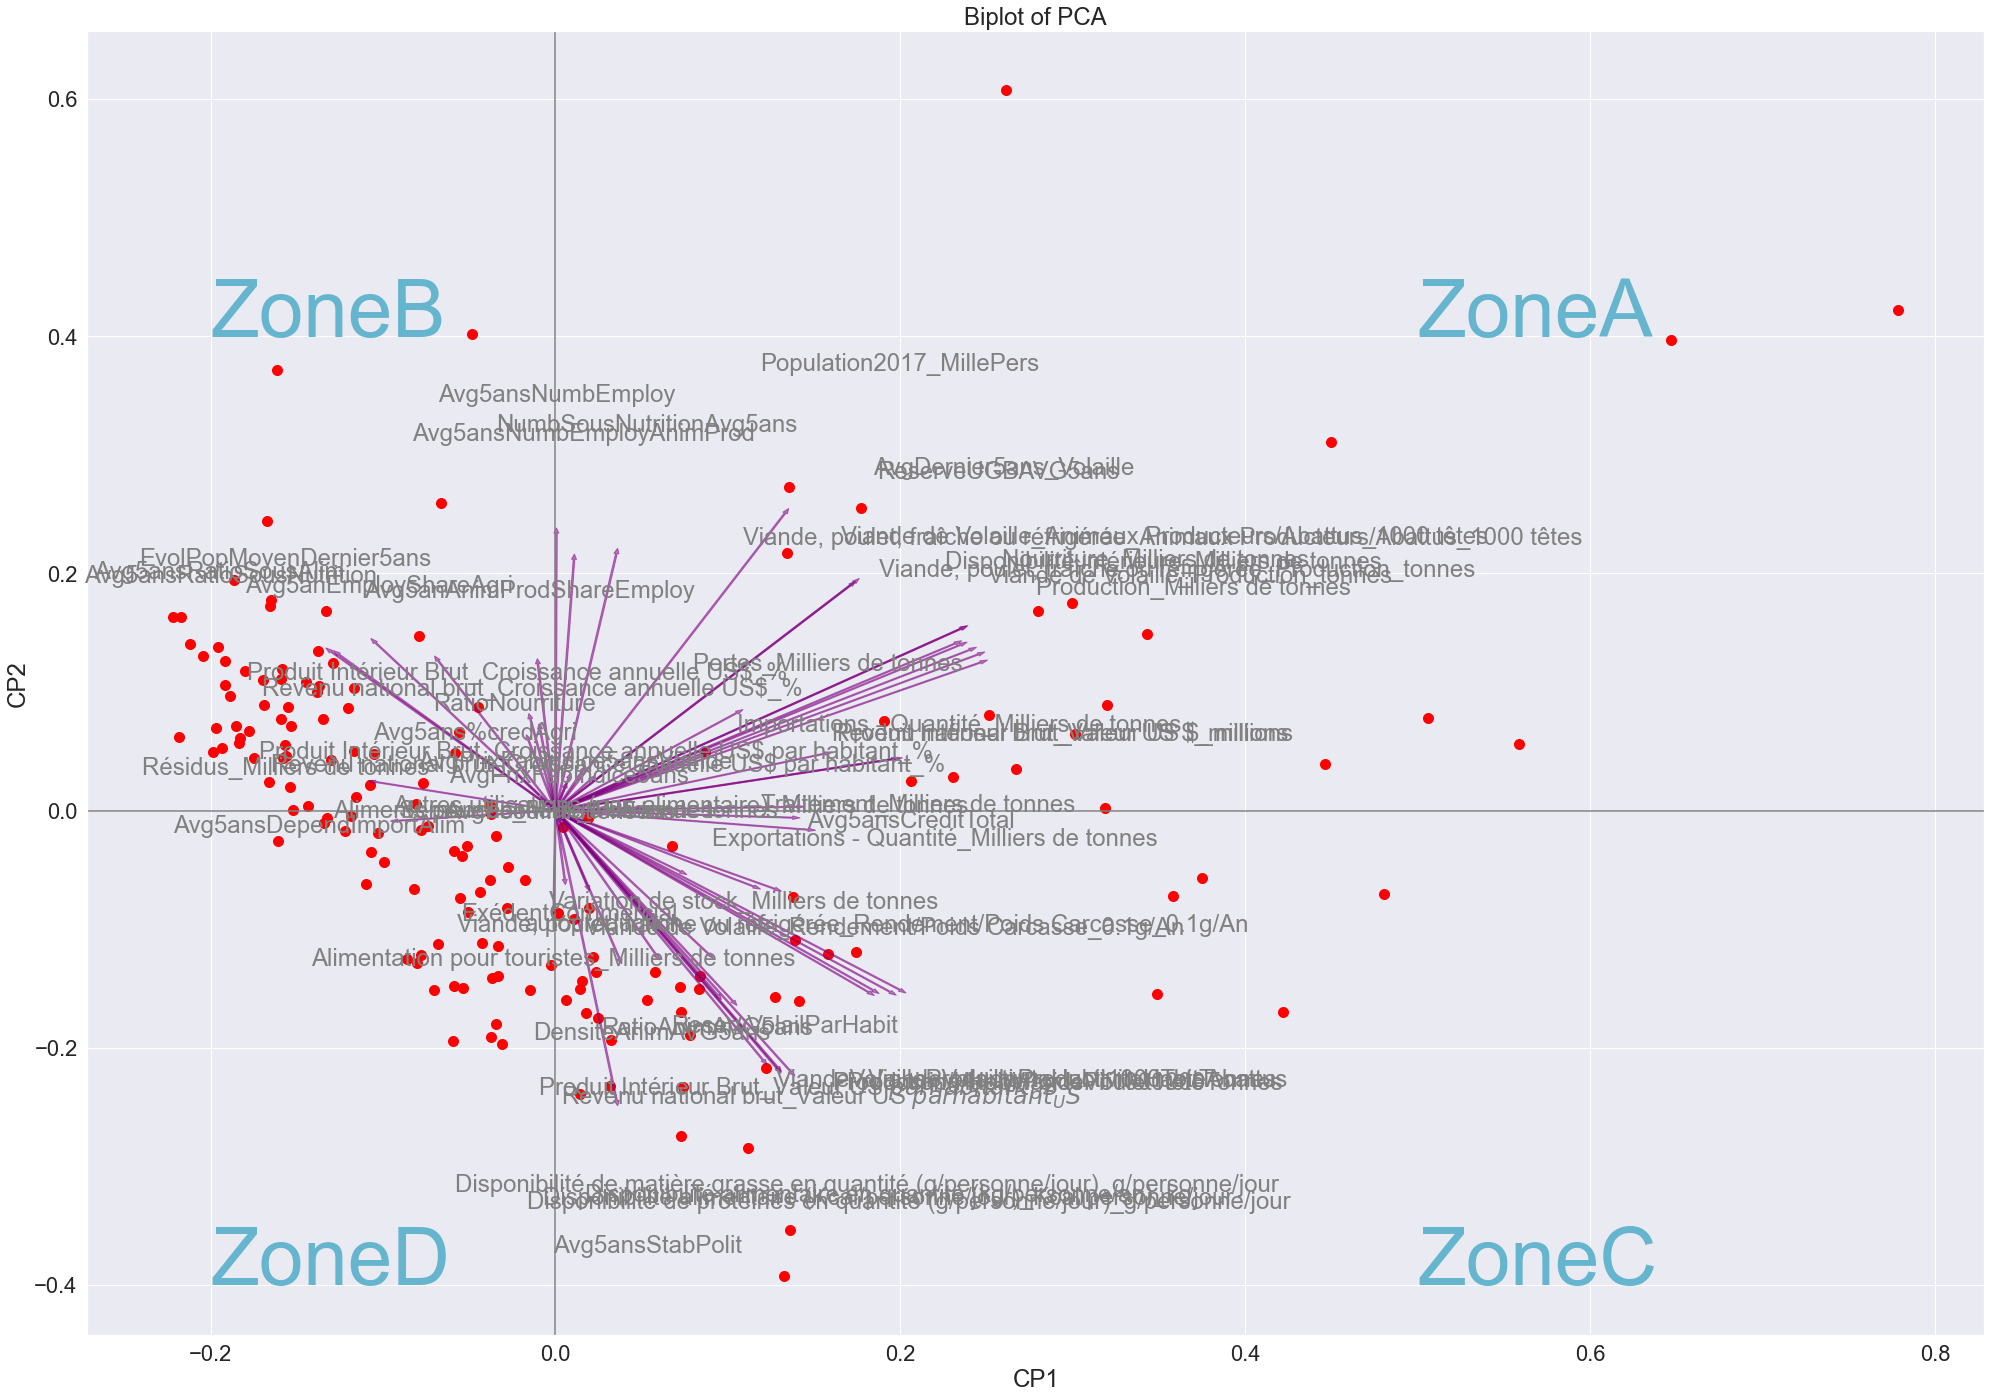

In [28]:

#Appliquer biplot fonction à ACP de data set
biplot(score_presel, 
       np.transpose(model_presel.components_), 
       list(Tableau_preselectedACP_SCAL.columns))

# 9. Entrainner le dataframe avec ACP de 23 Composants Principaux
    -Entrainner ACP avec 23 Composants principaux
    -Attacher les 23 composants principaux à chaque pays
    -Etudier la ratio explicatif des 23 composants principaux sur chaque variable (colonne)
    -Visualiser la relation des 23 composants principaux et les variables

#### 9.1 Créer ACP et Entrainer avec 23 Composants principaux

In [29]:
#Entrainner les datas avec 23 composants confirmé dans l'analyse précédent
model_presel23=decomposition.PCA(n_components=23)
df_presel23=model_presel23.fit(Tableau_preselectedACP_SCAL)
score_presel23=model_presel23.transform(Tableau_preselectedACP_SCAL)

#### 9.2 Vérifier la dimension de nouveau dataframe après ACP
    La nouvelle dataframe contient 23 composants après la réduction de dimension

In [30]:
#Dimension des données après la réduction de dimension
score_presel23.shape

(163, 23)

In [31]:
#Dimension de dataframe initiale
Tableau_preselectedACP_SCAL.shape

(163, 59)

#### 9.3 Créer une dataframe cpVariable attacher les 23 composants principaux aux Zones

In [32]:
#Attaché les 23 CPs aux pays
cpZone = pd.DataFrame(data = score_presel23,index=TableauS1SansOutliers.index,
               columns = ['PC 1', 'PC 2','PC 3', 'PC 4','PC 5', 'PC 6','PC 7', 'PC 8',
                         'PC 9', 'PC 10','PC 11', 'PC 12','PC 13', 'PC 14','PC 15', 'PC 16',
                         'PC 17', 'PC 18','PC 19', 'PC 20','PC 21', 'PC 22','PC 23'])
 
cpZone.head(2)

PC 1      PC 2      PC 3      PC 4      PC 5  \
Code zone Zone                                                            
1         Arménie     -2.290945 -0.088113 -1.044414  0.055334 -0.883829   
2         Afghanistan -4.186900  3.139042  0.743747  1.097065  0.850105   

                           PC 6      PC 7      PC 8      PC 9     PC 10  \
Code zone Zone                                                            
1         Arménie      0.201979 -0.196881 -0.164900  0.300265 -1.057417   
2         Afghanistan -1.347753  0.911142  0.510545 -1.852342 -1.070715   

                          PC 11     PC 12     PC 13     PC 14     PC 15  \
Code zone Zone                                                            
1         Arménie     -0.976198  0.582618 -0.130347 -0.008660 -0.071262   
2         Afghanistan  1.638664 -0.467568 -0.118117 -0.357644  0.487137   

                          PC 16     PC 17     PC 18     PC 19     PC 20  \
Code zone Zone                                                            
1         Arménie      1.100792 -0.267829 -0.051638 -0.719502 -0.180532   
2         Afghanistan -0.341901  0.852765  0.850281 -1.341562  1.837256   

                          PC 21     PC 22     PC 23  
Code zone Zone                                       
1         Arménie      0.260648  0.076430  0.367881  
2         Afghanistan -2.032782 -1.624521  0.143126

#### 9.4 Créer une dataframe ComposantVariable pour identifier le poids de chaque variable représenté par chaque composant principal

In [33]:

model_presel23.components_
acpcomposant = model_presel23.components_
NombreComposant = model_presel23.n_features_
ListeComposant = ["PC"+str(i) for i in list(range(1, NombreComposant+1))]

#Affichier la ratio représentatif de chaque CP pour chaque variable via une dataframe
ComposantVariable = pd.DataFrame.from_dict(dict(zip(ListeComposant, acpcomposant)))
ComposantVariable['Variable'] = Tableau_preselectedACP_SCAL.columns.values
ComposantVariable = ComposantVariable.set_index('Variable')
ComposantVariable.head(2)

PC1           PC2  \
Variable                                                                     
Alimentation pour touristes_Milliers de tonnes -9.598876e-04 -8.360105e-02   
Aliments pour animaux_Milliers de tonnes        2.983724e-16 -2.220446e-16   

                                                         PC3           PC4  \
Variable                                                                     
Alimentation pour touristes_Milliers de tonnes  8.714550e-02 -9.929437e-02   
Aliments pour animaux_Milliers de tonnes        1.665335e-16  5.551115e-17   

                                                         PC5           PC6  \
Variable                                                                     
Alimentation pour touristes_Milliers de tonnes -6.164117e-02 -7.444759e-02   
Aliments pour animaux_Milliers de tonnes       -5.551115e-17 -2.636780e-16   

                                                     PC7           PC8  \
Variable                                                                 
Alimentation pour touristes_Milliers de tonnes  0.231517 -1.528710e-01   
Aliments pour animaux_Milliers de tonnes       -0.000000 -2.775558e-17   

                                                         PC9          PC10  \
Variable                                                                     
Alimentation pour touristes_Milliers de tonnes -3.628790e-02  6.093688e-02   
Aliments pour animaux_Milliers de tonnes        2.012279e-16 -2.081668e-17   

                                                        PC11          PC12  \
Variable                                                                     
Alimentation pour touristes_Milliers de tonnes  1.171528e-01  4.063908e-01   
Aliments pour animaux_Milliers de tonnes        2.636780e-16 -1.387779e-17   

                                                        PC13          PC14  \
Variable                                                                     
Alimentation pour touristes_Milliers de tonnes -1.487331e-02 -4.238536e-01   
Aliments pour animaux_Milliers de tonnes       -5.833008e-17  3.686287e-16   

                                                        PC15          PC16  \
Variable                                                                     
Alimentation pour touristes_Milliers de tonnes  2.307651e-01 -3.658099e-01   
Aliments pour animaux_Milliers de tonnes        2.255141e-17  3.122502e-16   

                                                        PC17          PC18  \
Variable                                                                     
Alimentation pour touristes_Milliers de tonnes -1.695497e-02  5.336295e-02   
Aliments pour animaux_Milliers de tonnes        1.587272e-16 -2.185752e-16   

                                                        PC19          PC20  \
Variable                                                                     
Alimentation pour touristes_Milliers de tonnes  2.410459e-02 -1.068220e-01   
Aliments pour animaux_Milliers de tonnes       -8.673617e-17  1.249001e-16   

                                                        PC21          PC22  \
Variable                                                                     
Alimentation pour touristes_Milliers de tonnes  1.899776e-01 -8.258680e-03   
Aliments pour animaux_Milliers de tonnes       -3.608225e-16  1.613293e-16   

                                                        PC23  
Variable                                                      
Alimentation pour touristes_Milliers de tonnes -2.286921e-01  
Aliments pour animaux_Milliers de tonnes        3.053113e-16

##### Viasualiser via heatmap le poids de chaque variable dans chaque composant principal

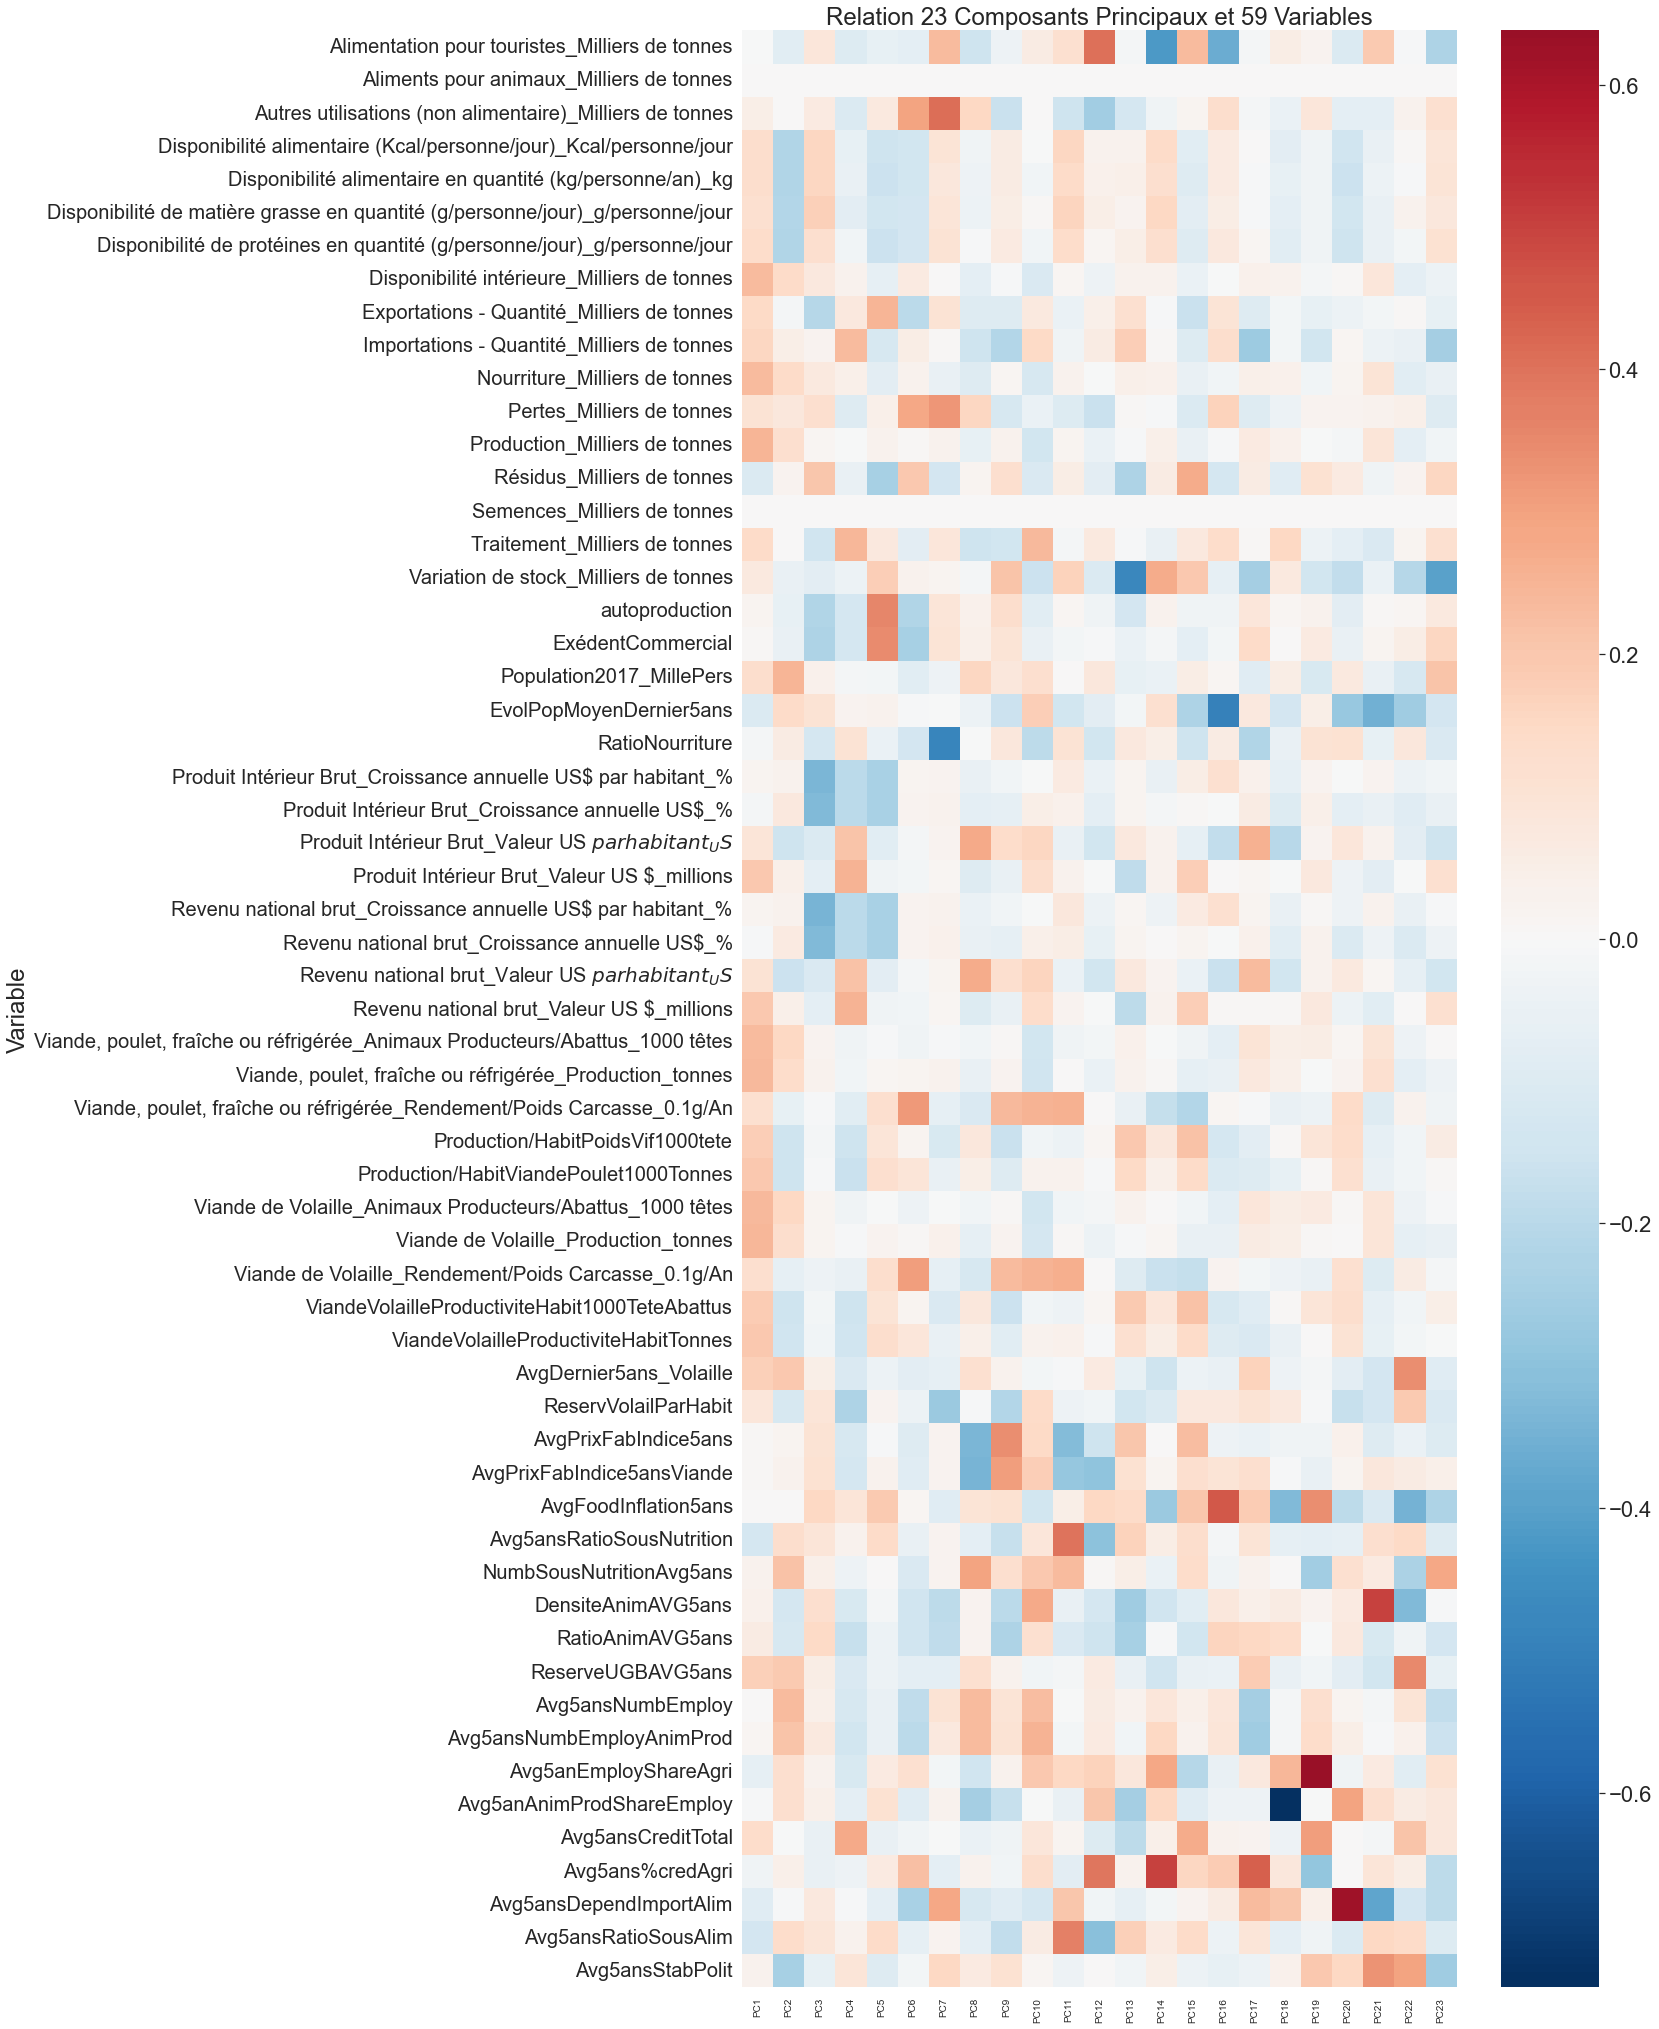

In [34]:
#Affichier la ratio représentatif de chaque CP pour chaque variable via heatmap
plt.figure(figsize=(16,36))
sns.heatmap(ComposantVariable,center = 0, cmap = 'RdBu_r')
plt.yticks(fontsize=20)
plt.xticks(fontsize=10)
plt.title('Relation 23 Composants Principaux et 59 Variables')
plt.show()

# 10. Construire Dendrogram

    Selon Dengrograme, nous pouvons faire 3 clusters mais il reste très limité et trop macro par rapport à l'objectif de projet.
    Nous décidons d'aller plus en détail avec 5 Clusters (ligne hexagonale dans la graphique:y=26)

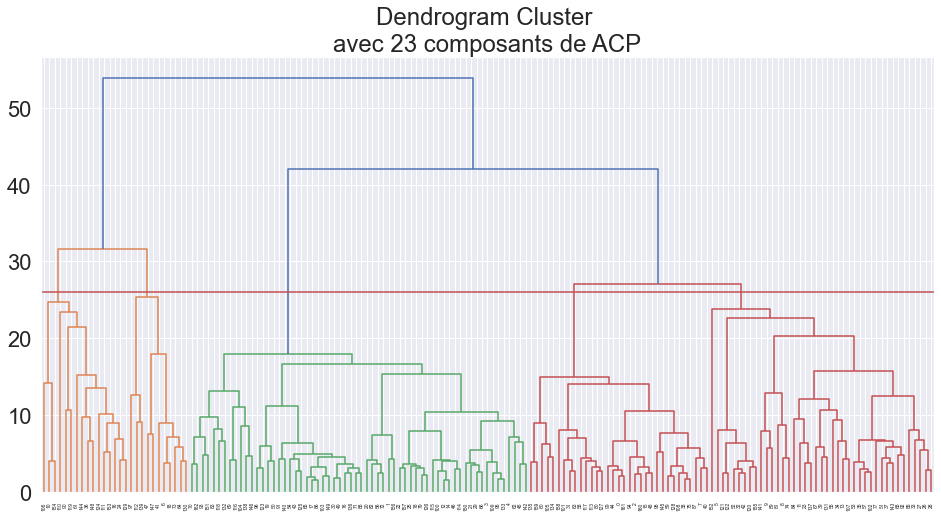

In [35]:

#Import sch, linkage,dendrogram
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(16,8))
#importer les nouvelles données de 23 composantx principaux retenu en ACP dans linkage puis dendrogram
dendrogram=sch.dendrogram(sch.linkage(score_presel23,method='ward'))

#Fixer le niveau de cluster
plt.axhline(y=26, c='r')
plt.title('Dendrogram Cluster \navec 23 composants de ACP')
plt.show()

# 11. AgglomerativeClustering (CAH)
    -Entainner CAH avec le nombre de cluster (5 )défini selon Dendrogramme
    -Affichier les pays de chaque cluster CAH
    -Etudier la caractéristique de chaque cluster CAH
    -Visualiser le cluster CAH avec 2 premiers composants principaux

#### 11.1 Entrainement de AgglomerativeClustering

In [36]:
#Initialiser Algorithme AgglomerativeClustering avec le méthode de calcule de distance euclidean et linkage ward
from sklearn.cluster import AgglomerativeClustering
cluster_euclidean_ward=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [37]:
#Entrainer les données de composants principaux 23 et obtenir les étiquettes cluster
cluster_euclidean_ward.fit_predict(score_presel23)
cluster_euclidean_ward.labels_

array([4, 2, 4, 2, 2, 3, 0, 4, 3, 3, 1, 3, 2, 3, 2, 4, 1, 2, 0, 2, 2, 2,
       2, 3, 1, 2, 3, 3, 3, 2, 2, 4, 3, 3, 3, 3, 1, 3, 4, 3, 4, 0, 3, 2,
       4, 2, 2, 0, 4, 2, 2, 3, 3, 3, 2, 3, 2, 3, 4, 4, 4, 1, 2, 4, 0, 2,
       2, 3, 3, 2, 2, 2, 2, 0, 3, 4, 2, 3, 2, 2, 4, 3, 2, 2, 3, 3, 2, 4,
       2, 3, 1, 2, 3, 2, 4, 2, 2, 0, 4, 4, 2, 4, 3, 2, 2, 4, 1, 3, 4, 2,
       1, 1, 0, 4, 2, 2, 2, 4, 2, 1, 3, 3, 3, 2, 1, 2, 2, 4, 4, 1, 0, 3,
       2, 2, 4, 4, 2, 3, 2, 0, 2, 3, 2, 3, 1, 4, 2, 0, 1, 2, 2, 2, 3, 1,
       1, 3, 2, 2, 4, 4, 4, 4, 2], dtype=int64)

#### 11.2 Visualiser Cluster de AgglomerativeClustering en 2D

In [38]:
#Créer une nouvelle colonne dans le tableau initial pour stocker l'étiquette des clusters venant de AgglomerativeClustering
TableauS1SansOutliers['CAH_nacp23component']=cluster_euclidean_ward.labels_
TableauS1SansOutliers.head(2)

Alimentation pour touristes_Milliers de tonnes  \
Code zone Zone                                                          
1         Arménie                                                 0.0   
2         Afghanistan                                             0.0   

                       Aliments pour animaux_Milliers de tonnes  \
Code zone Zone                                                    
1         Arménie                                           0.0   
2         Afghanistan                                       0.0   

                       Autres utilisations (non alimentaire)_Milliers de tonnes  \
Code zone Zone                                                                    
1         Arménie                                                    0.0          
2         Afghanistan                                                0.0          

                       Disponibilité alimentaire (Kcal/personne/jour)_Kcal/personne/jour  \
Code zone Zone                                                                             
1         Arménie                                                   54.0                   
2         Afghanistan                                                5.0                   

                       Disponibilité alimentaire en quantité (kg/personne/an)_kg  \
Code zone Zone                                                                     
1         Arménie                                                  16.06           
2         Afghanistan                                               1.53           

                       Disponibilité de matière grasse en quantité (g/personne/jour)_g/personne/jour  \
Code zone Zone                                                                                         
1         Arménie                                                   3.39                               
2         Afghanistan                                               0.33                               

                       Disponibilité de protéines en quantité (g/personne/jour)_g/personne/jour  \
Code zone Zone                                                                                    
1         Arménie                                                   5.44                          
2         Afghanistan                                               0.54                          

                       Disponibilité intérieure_Milliers de tonnes  \
Code zone Zone                                                       
1         Arménie                                             47.0   
2         Afghanistan                                         57.0   

                       Exportations - Quantité_Milliers de tonnes  \
Code zone Zone                                                      
1         Arménie                                             0.0   
2         Afghanistan                                         0.0   

                       Importations - Quantité_Milliers de tonnes  \
Code zone Zone                                                      
1         Arménie                                            35.0   
2         Afghanistan                                        29.0   

                       Nourriture_Milliers de tonnes  \
Code zone Zone                                         
1         Arménie                               47.0   
2         Afghanistan                           55.0   

                       Pertes_Milliers de tonnes  \
Code zone Zone                                     
1         Arménie                            0.0   
2         Afghanistan                        2.0   

                       Production_Milliers de tonnes  \
Code zone Zone                                         
1         Arménie                               11.0   
2         Afghanistan                           28.0   

                       Résidus_Milliers de tonnes  \
Code zone Zone                                      
1       

##### Création de graphique CAH

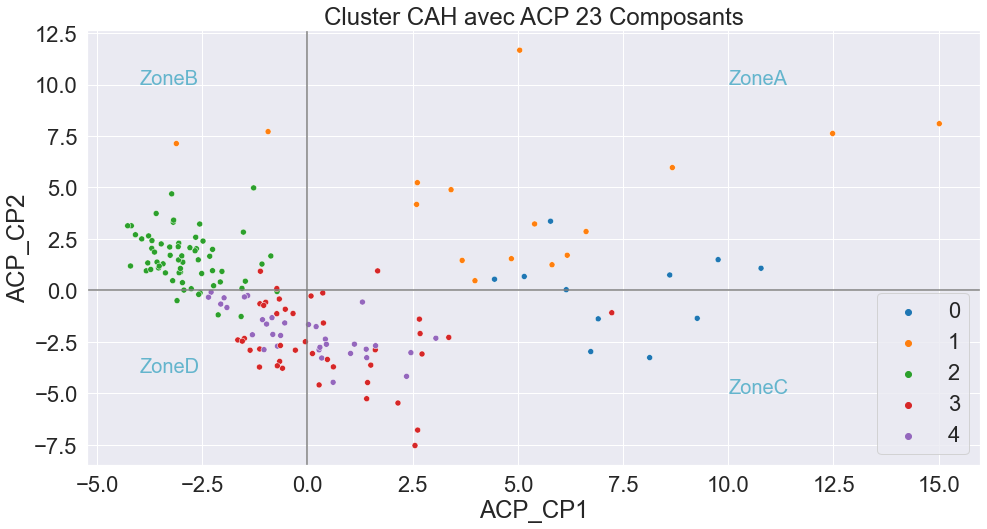

In [39]:
color=sns.color_palette("tab10")
plt.figure(figsize=(16,8))
sns.scatterplot(x=score_presel[:,0], y=score_presel23[:,1], hue=cluster_euclidean_ward.labels_,palette='tab10')
plt.title('Cluster CAH avec ACP 23 Composants')
plt.axhline(y=0, color="grey", linestyle="-")
plt.axvline(x=0, color="grey", linestyle="-")
plt.annotate('ZoneA',(10,10),size=20,color='c')
plt.annotate('ZoneB',(-4,10),size=20,color='c')
plt.annotate('ZoneC',(10,-5),size=20,color='c')
plt.annotate('ZoneD',(-4,-4),size=20,color='c')
plt.xlabel('ACP_CP1')
plt.ylabel('ACP_CP2')
plt.legend()
plt.show()

#### 11.3 Taille de Cluster de AgglomerativeClustering

Cluster CAH  Nombre de Zones
0            2               62
1            3               41
2            4               33
3            1               16
4            0               11

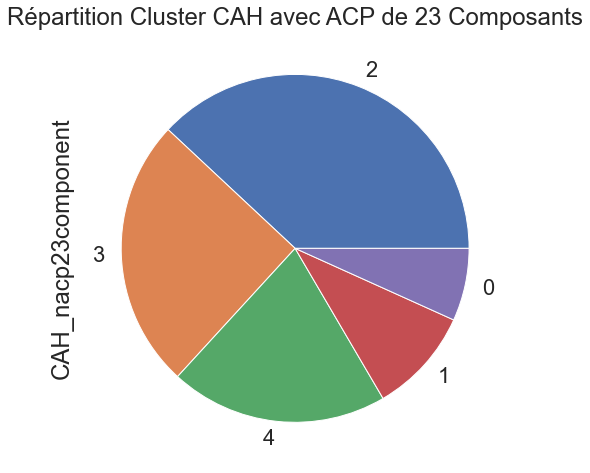

In [40]:
display(TableauS1SansOutliers.CAH_nacp23component.value_counts(
).reset_index().rename(columns={'index':'Cluster CAH','CAH_nacp23component':'Nombre de Zones'}))

plt.figure(figsize=(10,8))
TableauS1SansOutliers.CAH_nacp23component.value_counts().plot.pie()
plt.title('Répartition Cluster CAH avec ACP de 23 Composants')
plt.show()

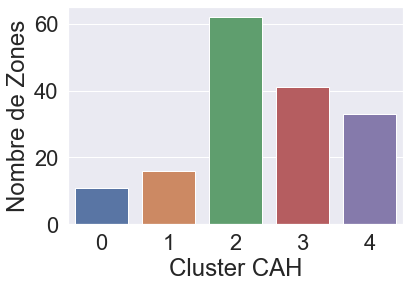

In [41]:
CAHcluster=TableauS1SansOutliers.CAH_nacp23component.value_counts(
).reset_index().rename(columns={'index':'Cluster CAH','CAH_nacp23component':'Nombre de Zones'})
sns.barplot(x='Cluster CAH',y='Nombre de Zones',data=CAHcluster)
plt.show()

#### 11.4 Caractèristique de Cluster de AgglomerativeClustering

In [42]:
MoyenneClusterCAH=TableauS1SansOutliers.groupby('CAH_nacp23component').mean()
MoyenneClusterCAH

Alimentation pour touristes_Milliers de tonnes  \
CAH_nacp23component                                                   
0                                                          0.000000   
1                                                          0.000000   
2                                                          0.000000   
3                                                          0.853659   
4                                                          0.000000   

                     Aliments pour animaux_Milliers de tonnes  \
CAH_nacp23component                                             
0                                                         0.0   
1                                                         0.0   
2                                                         0.0   
3                                                         0.0   
4                                                         0.0   

                     Autres utilisations (non alimentaire)_Milliers de tonnes  \
CAH_nacp23component                                                             
0                                                             0.000000          
1                                                            48.937500          
2                                                             0.741935          
3                                                            11.902439          
4                                                             0.363636          

                     Disponibilité alimentaire (Kcal/personne/jour)_Kcal/personne/jour  \
CAH_nacp23component                                                                      
0                                                            98.636364                   
1                                                            76.750000                   
2                                                            22.564516                   
3                                                           129.560976                   
4                                                            78.575758                   

                     Disponibilité alimentaire en quantité (kg/personne/an)_kg  \
CAH_nacp23component                                                              
0                                                            26.411818           
1                                                            20.988125           
2                                                             6.678548           
3                                                            34.535122           
4                                                            21.613939           

                     Disponibilité de matière grasse en quantité (g/personne/jour)_g/personne/jour  \
CAH_nacp23component                                                                                  
0                                                             6.130909                               
1                                                             5.080625                               
2                                                             1.417258                               
3                                                             8.950976                               
4                                                             4.809091                               

                     Disponibilité de protéines en quantité (g/personne/jour)_g/personne/jour  \
CAH_nacp23component                                                                             
0                                                            10.190000                          
1                                                             7.225625                          
2                                                             2.291290                          
3                                                            11.455610                       

In [43]:
MoyenneClusterCAHPrincipale=MoyenneClusterCAH[['Disponibilité alimentaire (Kcal/personne/jour)_Kcal/personne/jour',
                   'Importations - Quantité_Milliers de tonnes',
                    'Exportations - Quantité_Milliers de tonnes',
                    'Production_Milliers de tonnes',
                    'Nourriture_Milliers de tonnes',
                   'Population2017_MillePers',
                   'Produit Intérieur Brut_Valeur US $_millions',
                   'Avg5ansRatioSousAlim',
                   'Avg5ansStabPolit']]

MoyenneClusterCAHPrincipale.T

CAH_nacp23component                                            0  \
Disponibilité alimentaire (Kcal/personne/jour)_...  9.863636e+01   
Importations - Quantité_Milliers de tonnes          3.117273e+02   
Exportations - Quantité_Milliers de tonnes          4.864545e+02   
Production_Milliers de tonnes                       1.505364e+03   
Nourriture_Milliers de tonnes                       1.239909e+03   
Population2017_MillePers                            5.074063e+04   
Produit Intérieur Brut_Valeur US $_millions         1.736204e+06   
Avg5ansRatioSousAlim                                2.996364e+00   
Avg5ansStabPolit                                    4.576364e-01   

CAH_nacp23component                                             1  \
Disponibilité alimentaire (Kcal/personne/jour)_...      76.750000   
Importations - Quantité_Milliers de tonnes             209.875000   
Exportations - Quantité_Milliers de tonnes              59.687500   
Production_Milliers de tonnes                         1568.500000   
Nourriture_Milliers de tonnes                         1618.375000   
Population2017_MillePers                             91915.047750   
Produit Intérieur Brut_Valeur US $_millions         461501.182262   
Avg5ansRatioSousAlim                                     6.768750   
Avg5ansStabPolit                                        -1.005375   

CAH_nacp23component                                            2  \
Disponibilité alimentaire (Kcal/personne/jour)_...     22.564516   
Importations - Quantité_Milliers de tonnes             34.580645   
Exportations - Quantité_Milliers de tonnes              0.709677   
Production_Milliers de tonnes                          46.564516   
Nourriture_Milliers de tonnes                          76.064516   
Population2017_MillePers                            17990.413952   
Produit Intérieur Brut_Valeur US $_millions         37441.656828   
Avg5ansRatioSousAlim                                   16.412728   
Avg5ansStabPolit                                       -0.471323   

CAH_nacp23component                                            3  \
Disponibilité alimentaire (Kcal/personne/jour)_...    129.560976   
Importations - Quantité_Milliers de tonnes             36.731707   
Exportations - Quantité_Milliers de tonnes              9.707317   
Production_Milliers de tonnes                         203.756098   
Nourriture_Milliers de tonnes                         198.463415   
Population2017_MillePers                             7331.197634   
Produit Intérieur Brut_Valeur US $_millions         65085.211145   
Avg5ansRatioSousAlim                                    7.362042   
Avg5ansStabPolit                                        0.225054   

CAH_nacp23component                                             4  
Disponibilité alimentaire (Kcal/personne/jour)_...      78.575758  
Importations - Quantité_Milliers de tonnes              67.666667  
Exportations - Quantité_Milliers de tonnes              52.090909  
Production_Milliers de tonnes                          115.181818  
Nourriture_Milliers de tonnes                          114.727273  
Population2017_MillePers                              5447.004333  
Produit Intérieur Brut_Valeur US $_millions         171034.684027  
Avg5ansRatioSousAlim                                     3.213333  
Avg5ansStabPolit                                         0.600460

In [44]:
clusterCAH=TableauS1SansOutliers.reset_index()

#### 11.5 Affichier les pays des clusters CAH

In [45]:
for i in [0, 1,2,3,4]:
    print(len(clusterCAH[clusterCAH['CAH_nacp23component']==i].Zone.unique()),
         'pays dans le cluster',
          i,
          'de CAH\n')
    print(clusterCAH[clusterCAH['CAH_nacp23component']==i].Zone.unique())
    print('-------------------------------------------------------------------')

11 pays dans le cluster 0 de CAH

['Australie' 'Canada' 'France' 'Allemagne' 'Italie' 'République de Corée'
 'Pays-Bas' 'Pologne' 'Espagne' 'Thaïlande'
 "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"]
-------------------------------------------------------------------
16 pays dans le cluster 1 de CAH

['Bangladesh' 'Myanmar' 'Colombie' 'Égypte'
 "Iran (République islamique d')" 'Mexique' 'Pakistan' 'Pérou'
 'Philippines' 'Fédération de Russie' 'Arabie saoudite' 'Afrique du Sud'
 'Turquie' 'Ukraine' 'Viet Nam' 'Éthiopie']
-------------------------------------------------------------------
62 pays dans le cluster 2 de CAH

['Afghanistan' 'Algérie' 'Angola' 'Botswana' 'Îles Salomon' 'Cameroun'
 'Cabo Verde' 'République centrafricaine' 'Sri Lanka' 'Tchad' 'Congo'
 'Azerbaïdjan' 'Bénin' 'Djibouti' 'Gabon' 'Gambie' 'Ghana' 'Kiribati'
 'Guinée' 'Haïti' 'Iraq' "Côte d'Ivoire" 'Kazakhstan' 'Kirghizistan'
 'Kenya' 'Cambodge' 'République populaire démocratique de Corée'
 'République démocr

##### Description des groupe CAH 
    Groupe 0 sont les pays riche mais avec le besoin d'importation important, il sont également les pays qui exporte plus.
    
    Groupe 1 sont les pays envoie développement, avec le besoin d'importation important, l'exportation faible et environnement politique moins stable.
    
    Groupe 0 et 1 sont également les pays qui produient plus de volaille.
    
    
    Groupe 2 sont les pays pauvres, avec l'importation faible, ratio sous nutrition élévé,moins peuplé
    
    Groupe 3 sont les pays en voie développement ou pauvres avec faible importation et exportation, moins peuplé, mais avec haut disponibilité alimentaire.Il sont une autosuffisance de volaille élevée.
    
    Groupe 4 sont les pays riches , moins peuplé, avec faible importation et exportation
    
    Les pays cibles comme les clients potentiels seront dans le cluster 0 et 1.

In [46]:
MoyenneClusterCAHPrincipale=MoyenneClusterCAHPrincipale.reset_index()

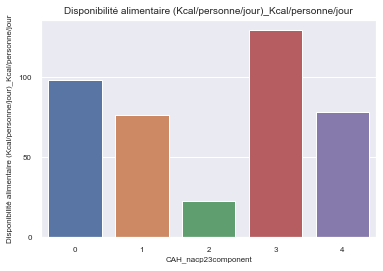

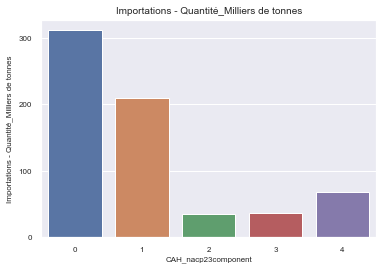

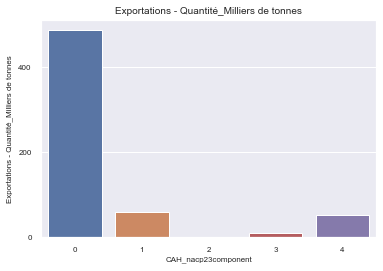

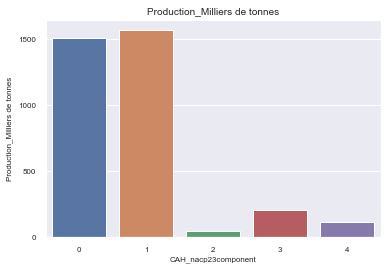

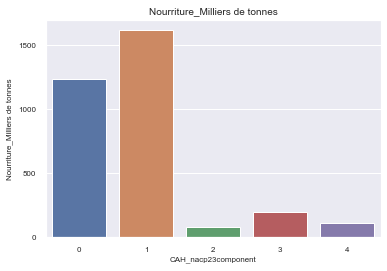

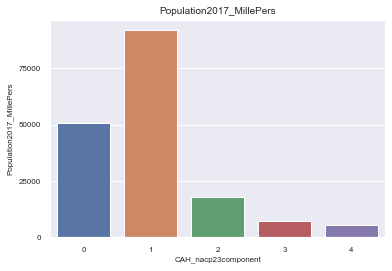

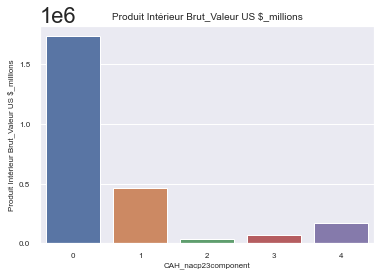

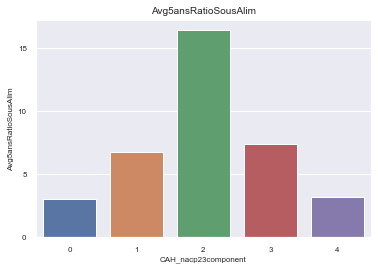

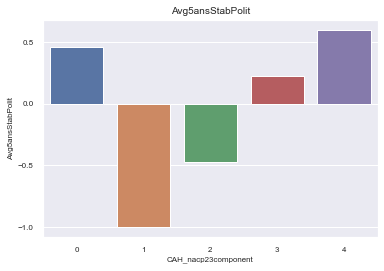

In [47]:

#Affichier la moyenne de chaque cluster dans le graphique en fonction de variable sélectionnée 

for i in ['Disponibilité alimentaire (Kcal/personne/jour)_Kcal/personne/jour',
       'Importations - Quantité_Milliers de tonnes',
       'Exportations - Quantité_Milliers de tonnes',
       'Production_Milliers de tonnes', 
        'Nourriture_Milliers de tonnes',
       'Population2017_MillePers',
       'Produit Intérieur Brut_Valeur US $_millions', 
        'Avg5ansRatioSousAlim',
       'Avg5ansStabPolit']:
    plt.figure(figsize=(6,4))
    sns.barplot(x="CAH_nacp23component",
                                 y=i,data=MoyenneClusterCAHPrincipale)
    plt.ylabel(i,fontsize=8)
    plt.yticks(fontsize=8)
    plt.xlabel('CAH_nacp23component',fontsize=8)
    plt.xticks(fontsize=8)
    plt.title(i,fontsize=10)

    plt.show()

# 12. KMEANS sur ACP de 23 Composants Principaux
    -Identifier le nombre de cluster Kmeans optimal avec Elbow et Silhouette
    -Entrainner Kmeans avec le nombre de cluster kmean optimal (7)
    -Affichier les pays de chaque cluster Kmeans
    -Etudier les caractéristiques de chaque cluster
    -Visualisation avec 2 premiers composants principaux
    

#### 12.1 Identifier le nombre de clusters optimals de Kmeans

##### Méthode ELBOW

    La graphique méthode ELBOW montre un courbe lisse, et plus possibilité.
    Dont:
        Cluster Optimale 1  l'information est macro comme nous avons vue avec dendrogramme
        
        Cluster Optimale 2  Le niveau de cluster rassemble proche de l'objectif du projet
        
        Cluster Optimale 3  L'information sera trop en détail

In [48]:
from sklearn.cluster import KMeans

#Créer liste vide pour stocker la meilleur note de elbow
inertS2=[]

#Calculer la note elbow de 1 à 19 cluster
for i in range(1,19):
    
    kmeans_ACP=KMeans(n_clusters=i, init ='k-means++',random_state=123)
    kmeans_ACP.fit(score_presel23)
    inertS2.append(kmeans_ACP.inertia_)

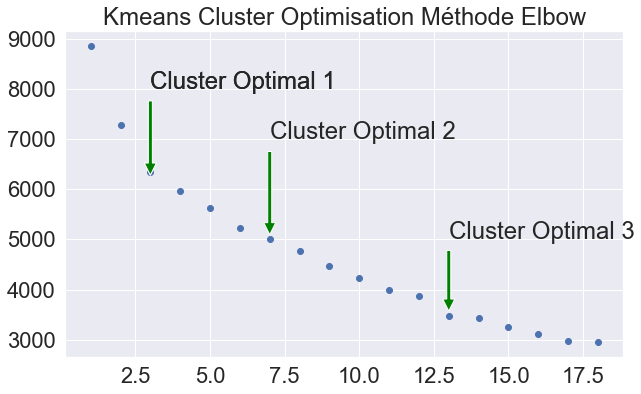

In [49]:

#Affichier graphique ELBOW en identifiant les clusters optimaux possibles

plt.figure(figsize=(10,6))
plt.scatter(range(1,19),inertS2,marker='o')

#Ajouter les notes sur les clusters identifiés
plt.annotate('Cluster Optimal 1', xy =(3, 6200),
                xytext =(3, 8000), 
                arrowprops = dict(facecolor ='green',
                                  shrink = 0.05),)

plt.annotate('Cluster Optimal 1', xy =(3, 6200),
                xytext =(3, 8000), 
                arrowprops = dict(facecolor ='green',
                              shrink = 0.05),)

plt.annotate('Cluster Optimal 2', xy =(7, 5000),
                xytext =(7, 7000), 
                arrowprops = dict(facecolor ='green',
                                  shrink = 0.05),)

plt.annotate('Cluster Optimal 3', xy =(13, 3500),
                xytext =(13, 5000), 
                arrowprops = dict(facecolor ='green',
                                  shrink = 0.05),)

plt.title('Kmeans Cluster Optimisation Méthode Elbow')
plt.show()

##### SILHOUETTE

    Avec Méthode Silhouette, on trouve que 7 clusters a obtenu la meilleure note (2 clusters est trop macro au niveau d'information)

In [50]:
from sklearn.metrics import silhouette_score
#Entrainner les données avec 1 à 20 cluster
kmeansS1Clusters=[KMeans(n_clusters=i, init ='k-means++',random_state=123).fit(score_presel23) for i in range(1,20)]
#Calculer silhouette score pour chaque cluster
silhouetteScoreS1=[silhouette_score(score_presel23,model.labels_) for model in kmeansS1Clusters[1:]]


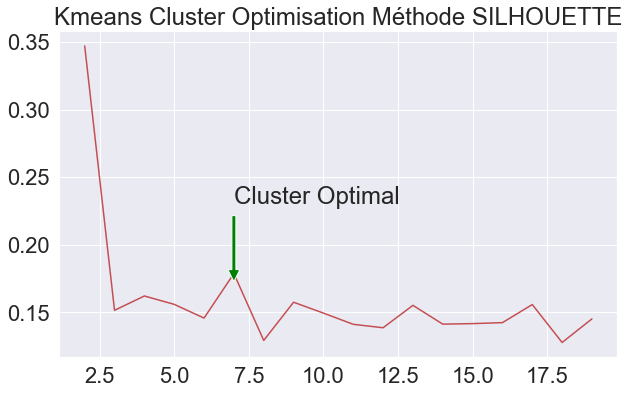

In [51]:
#Affichier la note pour chaque cluster
plt.figure(figsize=(10,6))
plt.plot(range(2,20),silhouetteScoreS1,color='r')
plt.title('Kmeans Cluster Optimisation Méthode SILHOUETTE')

#Ajouter la note pour le cluster sélectionné
plt.annotate('Cluster Optimal', xy =(7, 0.17),
                xytext =(7, 0.23), 
                arrowprops = dict(facecolor ='green',
                                  shrink = 0.05),)

plt.show()

###### Le note de 7 clusters est 0.178789 qui est le meilleur que les autres sauf le 2 clusters

In [52]:
#Affichier la note de chaque cluster en format dataframe
pd.DataFrame(silhouetteScoreS1,range(2,20)).reset_index().rename(columns={'index':'KMcluster',0:'Score'})

KMcluster     Score
0           2  0.347120
1           3  0.151614
2           4  0.162190
3           5  0.156019
4           6  0.145865
5           7  0.178789
6           8  0.129321
7           9  0.157586
8          10  0.149549
9          11  0.141253
10         12  0.138710
11         13  0.155283
12         14  0.141379
13         15  0.141771
14         16  0.142490
15         17  0.155874
16         18  0.127819
17         19  0.145298

#### 12.2 KMEANS Avec 7 Clusters

##### Entrainer donnée ACP dans Kmeans avec 7 clusters

In [53]:
#Appliquer 7 cluster selon l'analyse précédent
kmeans_ACP=KMeans(n_clusters=7, init ='k-means++',random_state=123)
kmeans_ACP.fit(score_presel23)

KMeans(n_clusters=7, random_state=123)

##### Attaché les 2 composants principaux de ACP à Zones en dataframe

In [54]:
#Ajouter 2 premiers CPs et l'étiquette de 7 clusters kmeans dans le tableau origine
TableauS1SansOutliers['Composant1']=score_presel23[:,0]
TableauS1SansOutliers['Composant2']=score_presel23[:,1]
TableauS1SansOutliers['pcaKmeansCluster']=kmeans_ACP.labels_
TableauS1SansOutliers.head()

Alimentation pour touristes_Milliers de tonnes  \
Code zone Zone                                                          
1         Arménie                                                 0.0   
2         Afghanistan                                             0.0   
3         Albanie                                                 0.0   
4         Algérie                                                 0.0   
7         Angola                                                  0.0   

                       Aliments pour animaux_Milliers de tonnes  \
Code zone Zone                                                    
1         Arménie                                           0.0   
2         Afghanistan                                       0.0   
3         Albanie                                           0.0   
4         Algérie                                           0.0   
7         Angola                                            0.0   

                       Autres utilisations (non alimentaire)_Milliers de tonnes  \
Code zone Zone                                                                    
1         Arménie                                                    0.0          
2         Afghanistan                                                0.0          
3         Albanie                                                    0.0          
4         Algérie                                                    0.0          
7         Angola                                                     0.0          

                       Disponibilité alimentaire (Kcal/personne/jour)_Kcal/personne/jour  \
Code zone Zone                                                                             
1         Arménie                                                   54.0                   
2         Afghanistan                                                5.0                   
3         Albanie                                                   85.0                   
4         Algérie                                                   22.0                   
7         Angola                                                    35.0                   

                       Disponibilité alimentaire en quantité (kg/personne/an)_kg  \
Code zone Zone                                                                     
1         Arménie                                                  16.06           
2         Afghanistan                                               1.53           
3         Albanie                                                  16.36           
4         Algérie                                                   6.38           
7         Angola                                                   10.56           

                       Disponibilité de matière grasse en quantité (g/personne/jour)_g/personne/jour  \
Code zone Zone                                                                                         
1         Arménie                                                   3.39                               
2         Afghanistan                                               0.33                               
3         Albanie                                                   6.45                               
4         Algérie                                                   1.50                               
7         Angola                                                    2.22                               

                       Disponibilité de protéines en quantité (g/personne/jour)_g/personne/jour  \
Code zone Zone                                                                                    
1         Arménie                                                   5.44                          
2         Afghanistan                                               0.54                          
3         Albanie                                                   6.26                          
4

In [55]:
#Affichier l'étiquette des clusters
TableauS1SansOutliers['pcaKmeansCluster'].unique()

array([1, 4, 2, 5, 0, 3, 6])

##### Identifier les Centroids de Kmeans de 7 Clusters

In [56]:
#Affichier les centroid
kmeans_ACP.cluster_centers_

array([[ 6.49955778e+00,  3.28524157e+00,  1.83951615e+00,
        -1.26563708e+00, -9.89638525e-01,  1.10103776e+00,
         4.25902917e-01, -1.75347838e-01, -5.38262637e-02,
        -6.84620624e-01, -4.77963539e-01, -4.40425299e-01,
         5.11059580e-01,  7.29557260e-02, -4.55884695e-01,
         2.07972794e-03,  4.45712414e-02,  5.36802204e-02,
         1.33996937e-01,  1.46110439e-01,  1.26107006e-01,
        -8.87171065e-02, -7.55703861e-02],
       [-2.70419236e+00,  1.20068588e+00, -2.02358558e-01,
         2.54974084e-01,  2.35442585e-01,  1.87549039e-01,
        -9.57511914e-02, -4.10870267e-01, -2.82536265e-01,
        -1.18905376e-01, -1.20824198e-01, -7.25447896e-02,
        -7.34263017e-02,  5.36353770e-02, -7.05619856e-02,
        -1.43625953e-02,  2.99766010e-02,  1.70957107e-02,
         1.13003525e-02,  2.62061809e-03,  2.46814605e-02,
         2.80401985e-02, -2.65410301e-02],
       [ 1.10746202e+00, -2.08103390e+00, -1.04128598e+00,
        -7.91127189e-02, -1.7

##### Visualiser les 7 clusters de ACP-Kmeans
    Nous trouvons que ACP-Kmeans sépare les groupes avec la même principe que l'algorithme CAH, c'est à dire qu'il regroupe les pays 
    par rapport au niveau de richesse, de développement économique, de besoin de volaille des pays.
    

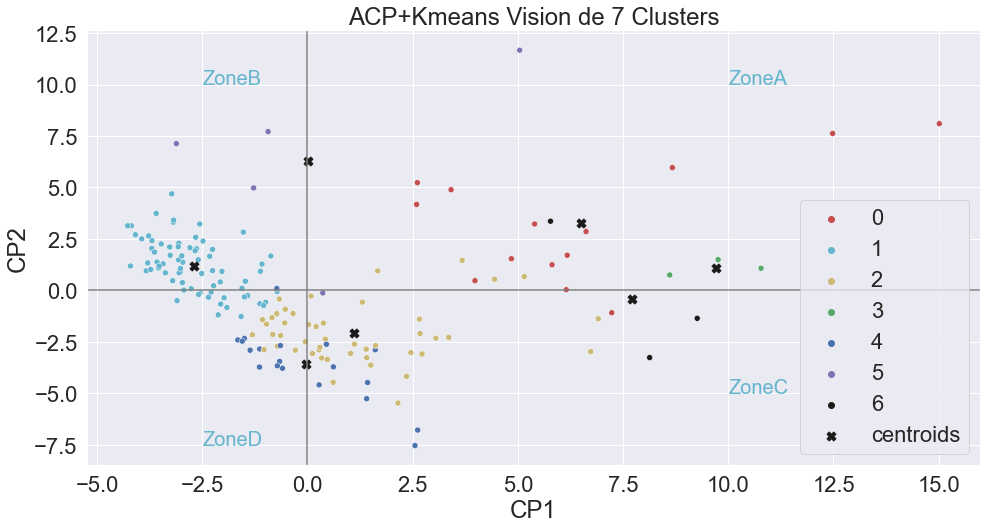

In [57]:
yax=TableauS1SansOutliers['Composant1']
xax=TableauS1SansOutliers['Composant2']

#Affichier les points selon cluster kmeans avec 2 premiers CPs
plt.figure(figsize=(16,8))
sns.scatterplot(x=TableauS1SansOutliers['Composant1'],
                y=TableauS1SansOutliers['Composant2'],
                hue=TableauS1SansOutliers['pcaKmeansCluster'],
               palette=['r','c','y','g','b','m','k'])

plt.scatter(kmeans_ACP.cluster_centers_[:,0], kmeans_ACP.cluster_centers_[:,1], 
            marker="X", c="k", s=80, label="centroids")

plt.axhline(y=0, color="grey", linestyle="-")
plt.axvline(x=0, color="grey", linestyle="-")
plt.annotate('ZoneA',(10,10),size=20,color='c')
plt.annotate('ZoneB',(-2.5,10),size=20,color='c')
plt.annotate('ZoneC',(10,-5),size=20,color='c')
plt.annotate('ZoneD',(-2.5,-7.5),size=20,color='c')



plt.legend()



plt.xlabel('CP1')
plt.ylabel('CP2')
plt.title('ACP+Kmeans Vision de 7 Clusters')
plt.show()


##### Nombre de Zones par clusters Kmeans

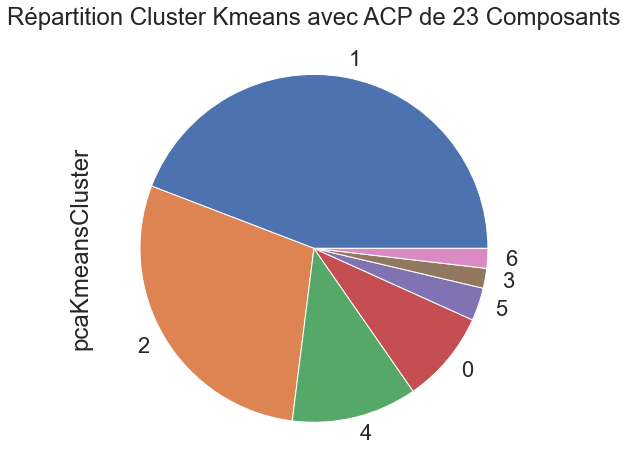

In [58]:
#Répartition des pays par cluster en graphique camenbert
plt.figure(figsize=(10,8))
TableauS1SansOutliers.pcaKmeansCluster.value_counts().plot.pie()
plt.title('Répartition Cluster Kmeans avec ACP de 23 Composants')
plt.show()

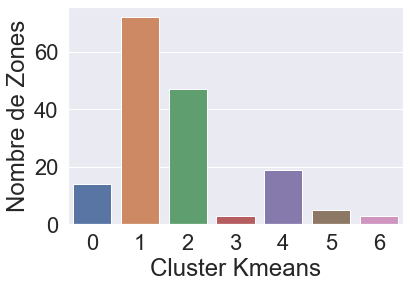

In [59]:
#Nombre pays par cluster
KMEANScluster=TableauS1SansOutliers.pcaKmeansCluster.value_counts(
).reset_index().rename(columns={'index':'Cluster Kmeans','pcaKmeansCluster':'Nombre de Zones'})
sns.barplot(x='Cluster Kmeans',y='Nombre de Zones',data=KMEANScluster)
plt.show()

##### Caractère de cluster Kmeans

In [60]:
#Calculer la moyenne de chaque variable par cluster
MoyenneClusterKmeans=TableauS1SansOutliers.groupby('pcaKmeansCluster').mean()
MoyenneClusterKmeans=MoyenneClusterKmeans.reset_index()

In [61]:
MoyenneClusterKmeans

pcaKmeansCluster  Alimentation pour touristes_Milliers de tonnes  \
0                 0                                        0.000000   
1                 1                                        0.041667   
2                 2                                        0.148936   
3                 3                                        0.000000   
4                 4                                        1.315789   
5                 5                                        0.000000   
6                 6                                        0.000000   

   Aliments pour animaux_Milliers de tonnes  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
5                                       0.0   
6                                       0.0   

   Autres utilisations (non alimentaire)_Milliers de tonnes  \
0                                          78.785714          
1                                           1.611111          
2                                           1.978723          
3                                           0.000000          
4                                           0.894737          
5                                           0.000000          
6                                           0.000000          

   Disponibilité alimentaire (Kcal/personne/jour)_Kcal/personne/jour  \
0                                          97.857143                   
1                                          28.944444                   
2                                          91.914894                   
3                                          94.333333                   
4                                         170.315789                   
5                                          20.000000                   
6                                          74.666667                   

   Disponibilité alimentaire en quantité (kg/personne/an)_kg  \
0                                          26.807143           
1                                           8.324861           
2                                          24.655106           
3                                          24.770000           
4                                          45.761053           
5                                           5.756000           
6                                          21.193333           

   Disponibilité de matière grasse en quantité (g/personne/jour)_g/personne/jour  \
0                                           6.411429                               
1                                           1.862778                               
2                                           5.956809                               
3                                           5.643333                               
4                                          11.690526                               
5                                           1.256000                               
6                                           4.370000                               

   Disponibilité de protéines en quantité (g/personne/jour)_g/personne/jour  \
0                                           9.355000                          
1                                           2.840417                          
2                                           8.960000                          
3                                          10.226667                          
4                                          15.207895                          
5                                           2.004000                          
6                                           8.323333                          

   Disponibilité intérieure_Milliers de tonnes  \
0                                  2010.642857   
1                                    83.083333   
2     

#### 12.3 Affichier les pays des clusters Kmeans

In [62]:
TableauKmeans=TableauS1SansOutliers.reset_index()

In [63]:
#Affichier les pays par cluster
for i in [0,1, 2, 3, 4, 5, 6]:
    
    print(len(TableauKmeans[TableauKmeans['pcaKmeansCluster']==int(i)].Zone.unique()),
        'Pays dans le cluster',i,'de Kmeans, ils sont:\n')
    print(TableauKmeans[TableauKmeans['pcaKmeansCluster']==i].Zone.unique())
    print('---------------------------------------------------------------------------')

14 Pays dans le cluster 0 de Kmeans, ils sont:

['Myanmar' 'Colombie' 'Égypte' "Iran (République islamique d')" 'Malaisie'
 'Mexique' 'Pérou' 'Philippines' 'Fédération de Russie' 'Arabie saoudite'
 'Afrique du Sud' 'Espagne' 'Turquie' 'Viet Nam']
---------------------------------------------------------------------------
72 Pays dans le cluster 1 de Kmeans, ils sont:

['Arménie' 'Afghanistan' 'Albanie' 'Algérie' 'Angola' 'Botswana'
 'Îles Salomon' 'Cameroun' 'Cabo Verde' 'République centrafricaine'
 'Sri Lanka' 'Tchad' 'Congo' 'Cuba' 'Azerbaïdjan' 'Bénin' 'Djibouti'
 'Géorgie' 'Gabon' 'Gambie' 'Ghana' 'Kiribati' 'Guatemala' 'Guinée'
 'Haïti' 'Iraq' "Côte d'Ivoire" 'Kazakhstan' 'Kirghizistan' 'Kenya'
 'Cambodge' 'République populaire démocratique de Corée'
 'République démocratique populaire lao' 'Liban' 'Lesotho' 'Libéria'
 'Madagascar' 'Malawi' 'Mali' 'Mauritanie' 'Mongolie' 'Mozambique'
 'République de Moldova' 'Namibie' 'Népal' 'Macédoine du Nord' 'Vanuatu'
 'Nicaragua' 'Niger' 'Par

#### 12.4 Explication Cluster Keams:
    
##### Cluster 0,3 et 6
     
    Cluster Kmeans 0,3,6 sont les pays qui importe plus de volaille. 
    Ils sont également le principaux producteur de volaille.
    Dont Cluster 3 et 6 sont les pays principales d'exportation de volaille également.
    Cluster 3 a la meilleur note de l'environnement politique et niveau de sous nutrition
    Cluster 6 est en 2ième dans les 3.
    
    Cluster 3 et 6 ont les caractère de pays riches.
    Cluster 0 a les caractèristique de pays en voie de développement.
    
##### Cluster 2 et 4
    
    Ces 2 clusters importe moins, produits et consommes moins de volaille.
    Il sont les pays moins peuple et avec les caractères des pays riches ou en voie de développement avec autosuffisance de volaille élevée.Il ne sont pas les clients potentiels.
    
##### Cluster 1 et 5

    Ces 2 clusters sont avec disponibilité d'alimentaire modeste,importation et exportation faible, ratio sous nutrition haut, et stabilité politique faible. Dont Cluster 5 sont les pays peuplé. Ces caractère montre que ces 2 clusters sont les pays pauvres ou en voie de développement avec les difficultés économiques et sociales.Mais ils ne sont pas les clients potentiels comme la valeur de l'importation est très faible.

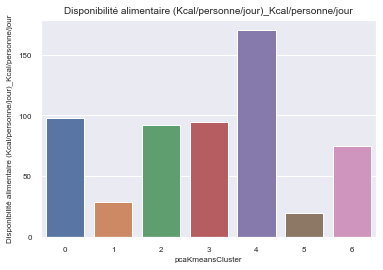

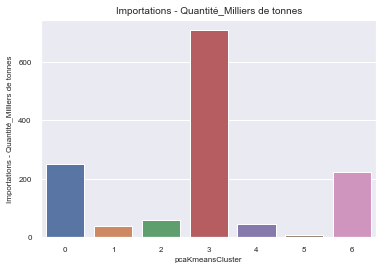

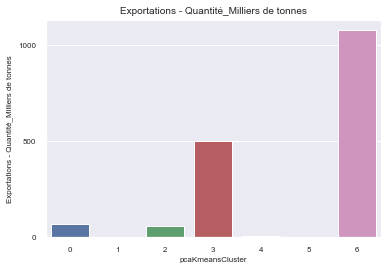

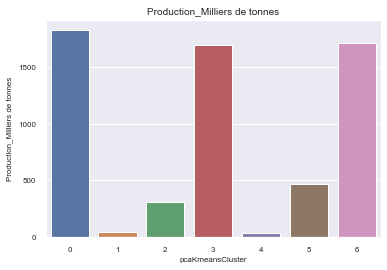

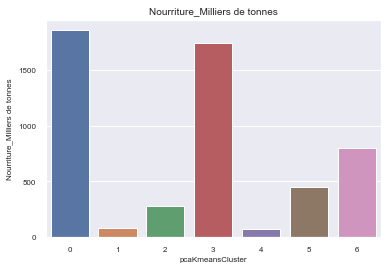

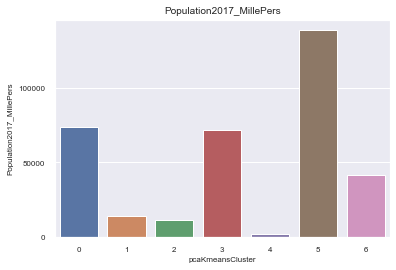

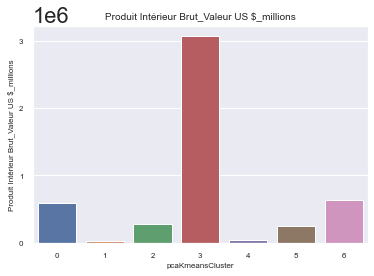

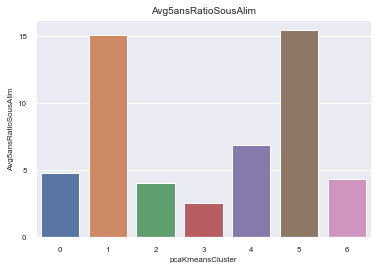

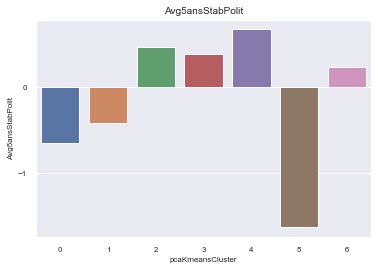

In [64]:
#Comparer les clusters par variable sélectionné
for i in ['Disponibilité alimentaire (Kcal/personne/jour)_Kcal/personne/jour',
       'Importations - Quantité_Milliers de tonnes',
       'Exportations - Quantité_Milliers de tonnes',
       'Production_Milliers de tonnes', 
        'Nourriture_Milliers de tonnes',
       'Population2017_MillePers',
       'Produit Intérieur Brut_Valeur US $_millions', 
        'Avg5ansRatioSousAlim',
       'Avg5ansStabPolit']:
    plt.figure(figsize=(6,4))
    sns.barplot(x="pcaKmeansCluster",
                                 y=i,
                                 data=MoyenneClusterKmeans)
    plt.ylabel(i,fontsize=8)
    plt.yticks(fontsize=8)
    plt.xlabel('pcaKmeansCluster',fontsize=8)
    plt.xticks(fontsize=8)
    plt.title(i,fontsize=10)
    plt.show()

# 13. Comparaison Kmeans Cluster VS CAH Cluster
    Vérifier les cohérences des pays entre clusters Kmeans et clusters CAH

#### 13.1 Comparer la différence en nombre de pays par cluster de 2 méthodes

In [65]:
#Comparer les clusters kmeans et les clusters CAH
CompCluster=TableauS1SansOutliers[['pcaKmeansCluster', 'CAH_nacp23component']].value_counts().reset_index().rename(columns={0:'Nombre de Zones'})
CompCluster=CompCluster.sort_values('pcaKmeansCluster',ascending=True)
CompCluster

pcaKmeansCluster  CAH_nacp23component  Nombre de Zones
16                 0                    0                1
13                 0                    3                1
4                  0                    1               12
6                  1                    3                4
5                  1                    4                7
0                  1                    2               61
7                  2                    0                4
11                 2                    1                1
1                  2                    4               25
3                  2                    3               17
8                  3                    0                3
2                  4                    3               18
12                 4                    4                1
15                 5                    3                1
9                  5                    1                3
14                 5                    2                1
10                 6                    0                3

#### 13.2 Analyser les différences

##### Kmeans Cluster 0 VS CAH Cluster 1 Cluster (Pays en voie développement)
    Espagne:
    Kmeans considère Espagne est un pays en voie développement,mais CAH le considère comme un pays riche, tous les 2 algorithmes le consière comme le client cible (le besoin d'importation importante), donc il n'y a pas de l'impact sur le résultat. 
    
    Malaisie:
    Kmeans considère Malaisie est un pays en voie développement avec l'importation forte,mais CAH le considère comme un pays en voie de développement avec l'importation faible.
    

In [66]:
TableauS1SansOutliers[(TableauS1SansOutliers.pcaKmeansCluster==0)&
                      ((TableauS1SansOutliers.CAH_nacp23component==0)|
                    (TableauS1SansOutliers.CAH_nacp23component==3))].sort_values('CAH_nacp23component')

Alimentation pour touristes_Milliers de tonnes  \
Code zone Zone                                                       
203       Espagne                                              0.0   
131       Malaisie                                             0.0   

                    Aliments pour animaux_Milliers de tonnes  \
Code zone Zone                                                 
203       Espagne                                        0.0   
131       Malaisie                                       0.0   

                    Autres utilisations (non alimentaire)_Milliers de tonnes  \
Code zone Zone                                                                 
203       Espagne                                                 0.0          
131       Malaisie                                              320.0          

                    Disponibilité alimentaire (Kcal/personne/jour)_Kcal/personne/jour  \
Code zone Zone                                                                          
203       Espagne                                               105.0                   
131       Malaisie                                              142.0                   

                    Disponibilité alimentaire en quantité (kg/personne/an)_kg  \
Code zone Zone                                                                  
203       Espagne                                               30.39           
131       Malaisie                                              39.21           

                    Disponibilité de matière grasse en quantité (g/personne/jour)_g/personne/jour  \
Code zone Zone                                                                                      
203       Espagne                                                5.72                               
131       Malaisie                                               9.65                               

                    Disponibilité de protéines en quantité (g/personne/jour)_g/personne/jour  \
Code zone Zone                                                                                 
203       Espagne                                               12.47                          
131       Malaisie                                              12.95                          

                    Disponibilité intérieure_Milliers de tonnes  \
Code zone Zone                                                    
203       Espagne                                        1497.0   
131       Malaisie                                       1621.0   

                    Exportations - Quantité_Milliers de tonnes  \
Code zone Zone                                                   
203       Espagne                                        212.0   
131       Malaisie                                        44.0   

                    Importations - Quantité_Milliers de tonnes  \
Code zone Zone                                                   
203       Espagne                                        205.0   
131       Malaisie                                        68.0   

                    Nourriture_Milliers de tonnes  Pertes_Milliers de tonnes  \
Code zone Zone                                                                 
203       Espagne                          1418.0                       66.0   
131       Malaisie                         1220.0                       82.0   

                    Production_Milliers de tonnes  Résidus_Milliers de tonnes  \
Code zone Zone                                                                  
203       Espagne                          1515.0                        -0.0   
131       Malaisie                         1724.0                        -1.0   

                    Semences_Milliers de tonnes  \
Code zone Zone                                    
203       Espagne                           0.0   
131       Malaisie                          0.0   

                    Traitement_Milliers

##### Kmeans Cluster 1 VS CAH Cluster 2 Cluster (Pays Pauvre, importation et exportation faible)
    
    Cuba, Guatemala, Liban Nicaragua de cluster 2 de Kmeans (pays pauvres),sont classé en en cluster 4 dans CAH (pays pauvre et envoie de développement)
    
    Arménie,Albanie,Géorgie,République de Moldova,Macédoine du Nord,Serbie,Monténégro de cluster 2 de Kmeans (pays pauvres) sont classé en cluster 4 dans CAH (pays riches)
    
    Mais les 2 algorithmes considère que ces pays ont faible besoin importation et exportation, ils ne serons pas comme les clients potentiels, donc il n'y a pas de l'impact sur le résultat.
    

In [67]:
TableauS1SansOutliers[(TableauS1SansOutliers.pcaKmeansCluster==1)&
                      ((TableauS1SansOutliers.CAH_nacp23component==3)|
                       (TableauS1SansOutliers.CAH_nacp23component==4))].sort_values('CAH_nacp23component')

Alimentation pour touristes_Milliers de tonnes  \
Code zone Zone                                                                    
49        Cuba                                                              3.0   
89        Guatemala                                                         0.0   
121       Liban                                                             0.0   
157       Nicaragua                                                         0.0   
1         Arménie                                                           0.0   
3         Albanie                                                           0.0   
73        Géorgie                                                           0.0   
146       République de Moldova                                             0.0   
154       Macédoine du Nord                                                 0.0   
272       Serbie                                                            0.0   
273       Monténégro                                                        0.0   

                                 Aliments pour animaux_Milliers de tonnes  \
Code zone Zone                                                              
49        Cuba                                                        0.0   
89        Guatemala                                                   0.0   
121       Liban                                                       0.0   
157       Nicaragua                                                   0.0   
1         Arménie                                                     0.0   
3         Albanie                                                     0.0   
73        Géorgie                                                     0.0   
146       République de Moldova                                       0.0   
154       Macédoine du Nord                                           0.0   
272       Serbie                                                      0.0   
273       Monténégro                                                  0.0   

                                 Autres utilisations (non alimentaire)_Milliers de tonnes  \
Code zone Zone                                                                              
49        Cuba                                                                70.0          
89        Guatemala                                                            0.0          
121       Liban                                                                0.0          
157       Nicaragua                                                            0.0          
1         Arménie                                                              0.0          
3         Albanie                                                              0.0          
73        Géorgie                                                              0.0          
146       République de Moldova                                                0.0          
154       Macédoine du Nord                                                    0.0          
272       Serbie                                                               0.0          
273       Monténégro                                                           0.0          

                                 Disponibilité alimentaire (Kcal/personne/jour)_Kcal/personne/jour  \
Code zone Zone                                                                                       
49        Cuba                                                                82.0                   
89        Guatemala                                                           71.0                   
121       Liban                                                               38.0                   
157       Nicaragua                                                           93.0                   
1         Arménie                                                             54.0                   
3         Albanie          

##### Kmeans Cluster 2 VS CAH Cluster 3 et 4 Cluster Pays faible besoin d'importation

    Australie,Canada,Italie,République de Corée de Cluster 2 de Kmeans sont classé en classe 0 dans CAH.
    Ukraine de Cluster 2 de Kmeans sont classé en classe 1 dans CAH.
    CAH considére que ces pays sont les clients potentiels, mais Kmeans les consière comme les pays avec les besoin d'importation faible, les besoins sont limitées.

In [68]:
TableauS1SansOutliers[(TableauS1SansOutliers.pcaKmeansCluster==2)&
                      ((TableauS1SansOutliers.CAH_nacp23component==0)|
                       (TableauS1SansOutliers.CAH_nacp23component==1))].sort_values('CAH_nacp23component')

Alimentation pour touristes_Milliers de tonnes  \
Code zone Zone                                                                  
10        Australie                                                       0.0   
33        Canada                                                          0.0   
106       Italie                                                          0.0   
117       République de Corée                                             0.0   
230       Ukraine                                                         0.0   

                               Aliments pour animaux_Milliers de tonnes  \
Code zone Zone                                                            
10        Australie                                                 0.0   
33        Canada                                                    0.0   
106       Italie                                                    0.0   
117       République de Corée                                       0.0   
230       Ukraine                                                   0.0   

                               Autres utilisations (non alimentaire)_Milliers de tonnes  \
Code zone Zone                                                                            
10        Australie                                                          0.0          
33        Canada                                                             0.0          
106       Italie                                                             0.0          
117       République de Corée                                                0.0          
230       Ukraine                                                            0.0          

                               Disponibilité alimentaire (Kcal/personne/jour)_Kcal/personne/jour  \
Code zone Zone                                                                                     
10        Australie                                                        192.0                   
33        Canada                                                           154.0                   
106       Italie                                                            65.0                   
117       République de Corée                                               62.0                   
230       Ukraine                                                           78.0                   

                               Disponibilité alimentaire en quantité (kg/personne/an)_kg  \
Code zone Zone                                                                             
10        Australie                                                        47.65           
33        Canada                                                           39.02           
106       Italie                                                           18.88           
117       République de Corée                                              16.70           
230       Ukraine                                                          22.62           

                               Disponibilité de matière grasse en quantité (g/personne/jour)_g/personne/jour  \
Code zone Zone                                                                                                 
10        Australie                                                        13.45                               
33        Canada                                                           10.54                               
106       Italie                                                            3.48                               
117       République de Corée                                               4.21                               
230       Ukraine                                                           5.11                               

                               Disponibilité de protéines en quantité (g/personne/jour)_g/personne/jour  \
Code zone Zone                                               

##### Kmeans Cluster 5 VS CAH Cluster 3 Cluster Pays pauvre ou en voie de développement avec besoin d'importation faible

    Bangladesh,Pakistan,Éthiopie ces 3 pays de cluster 5 de Kmeans(pays pauvres et risque) sont classé dans le cluster 1 de CAH (pays avec forte besoin).
    
    Ici Kmean a bien identifié le risque que CAH n'a pas pu les trouver car les 3 pays ont une stabilité politique très défavorable.

In [69]:
TableauS1SansOutliers[(TableauS1SansOutliers.pcaKmeansCluster==5)&
                      (TableauS1SansOutliers.CAH_nacp23component==1)].sort_values('CAH_nacp23component')

Alimentation pour touristes_Milliers de tonnes  \
Code zone Zone                                                         
16        Bangladesh                                             0.0   
165       Pakistan                                               0.0   
238       Éthiopie                                               0.0   

                      Aliments pour animaux_Milliers de tonnes  \
Code zone Zone                                                   
16        Bangladesh                                       0.0   
165       Pakistan                                         0.0   
238       Éthiopie                                         0.0   

                      Autres utilisations (non alimentaire)_Milliers de tonnes  \
Code zone Zone                                                                   
16        Bangladesh                                                0.0          
165       Pakistan                                                  0.0          
238       Éthiopie                                                  0.0          

                      Disponibilité alimentaire (Kcal/personne/jour)_Kcal/personne/jour  \
Code zone Zone                                                                            
16        Bangladesh                                                7.0                   
165       Pakistan                                                 20.0                   
238       Éthiopie                                                  0.0                   

                      Disponibilité alimentaire en quantité (kg/personne/an)_kg  \
Code zone Zone                                                                    
16        Bangladesh                                               1.50           
165       Pakistan                                                 5.86           
238       Éthiopie                                                 0.13           

                      Disponibilité de matière grasse en quantité (g/personne/jour)_g/personne/jour  \
Code zone Zone                                                                                        
16        Bangladesh                                               0.51                               
165       Pakistan                                                 1.25                               
238       Éthiopie                                                 0.03                               

                      Disponibilité de protéines en quantité (g/personne/jour)_g/personne/jour  \
Code zone Zone                                                                                   
16        Bangladesh                                               0.47                          
165       Pakistan                                                 1.97                          
238       Éthiopie                                                 0.04                          

                      Disponibilité intérieure_Milliers de tonnes  \
Code zone Zone                                                      
16        Bangladesh                                        250.0   
165       Pakistan                                         1282.0   
238       Éthiopie                                           14.0   

                      Exportations - Quantité_Milliers de tonnes  \
Code zone Zone                                                     
16        Bangladesh                                         0.0   
165       Pakistan                                           4.0   
238       Éthiopie                                           0.0   

                      Importations - Quantité_Milliers de tonnes  \
Code zone Zone                                                     
16        Bangladesh                                         0.0   
165       Pakistan                                           2.0   
238       Éthiopie                                           1.0   

            

##### Kmeans a bien identifié les 3 concurrents Pays-Bas,Pologne, Thaïlande avec cluster 6, mais CAH a les identifié dans groupe 0 (client potentiel)

In [70]:
TableauS1SansOutliers[(TableauS1SansOutliers.pcaKmeansCluster==6)].sort_values('CAH_nacp23component')

Alimentation pour touristes_Milliers de tonnes  \
Code zone Zone                                                        
150       Pays-Bas                                              0.0   
173       Pologne                                               0.0   
216       Thaïlande                                             0.0   

                     Aliments pour animaux_Milliers de tonnes  \
Code zone Zone                                                  
150       Pays-Bas                                        0.0   
173       Pologne                                         0.0   
216       Thaïlande                                       0.0   

                     Autres utilisations (non alimentaire)_Milliers de tonnes  \
Code zone Zone                                                                  
150       Pays-Bas                                                 0.0          
173       Pologne                                                  0.0          
216       Thaïlande                                                0.0          

                     Disponibilité alimentaire (Kcal/personne/jour)_Kcal/personne/jour  \
Code zone Zone                                                                           
150       Pays-Bas                                                70.0                   
173       Pologne                                                107.0                   
216       Thaïlande                                               47.0                   

                     Disponibilité alimentaire en quantité (kg/personne/an)_kg  \
Code zone Zone                                                                   
150       Pays-Bas                                               20.33           
173       Pologne                                                30.30           
216       Thaïlande                                              12.95           

                     Disponibilité de matière grasse en quantité (g/personne/jour)_g/personne/jour  \
Code zone Zone                                                                                       
150       Pays-Bas                                                3.74                               
173       Pologne                                                 6.18                               
216       Thaïlande                                               3.19                               

                     Disponibilité de protéines en quantité (g/personne/jour)_g/personne/jour  \
Code zone Zone                                                                                  
150       Pays-Bas                                                8.48                          
173       Pologne                                                12.14                          
216       Thaïlande                                               4.35                          

                     Disponibilité intérieure_Milliers de tonnes  \
Code zone Zone                                                     
150       Pays-Bas                                         372.0   
173       Pologne                                         1156.0   
216       Thaïlande                                        881.0   

                     Exportations - Quantité_Milliers de tonnes  \
Code zone Zone                                                    
150       Pays-Bas                                       1418.0   
173       Pologne                                        1025.0   
216       Thaïlande                                       796.0   

                     Importations - Quantité_Milliers de tonnes  \
Code zone Zone                                                    
150       Pays-Bas                                        608.0   
173       Pologne                                          55.0   
216       Thaïlande                                         2.0   

                     Nourriture_Milliers de tonnes  Pertes_Mi

##### Groupe 4 de Kmeans et Groupe 3 et 4 de CAH sont les pays riches avec faible besoin d'importation, 
    la différence entre Groupe 3 et 4 de CAH sont le niveau de développement des pays (ex disponibilité d'alimentaire, stabilité politique)
    Mais ces 2 ne sont pas le cluster cible pour trouver le client potentiel.
    Kmeans préconise également les pays de cluster 4 comme les pays avec faible besoin importation.

In [71]:

TableauS1SansOutliers[(TableauS1SansOutliers.pcaKmeansCluster==4)&
                      (TableauS1SansOutliers.CAH_nacp23component==4)].sort_values('CAH_nacp23component')

Alimentation pour touristes_Milliers de tonnes  \
Code zone Zone                                                                  
225       Émirats arabes unis                                             0.0   

                               Aliments pour animaux_Milliers de tonnes  \
Code zone Zone                                                            
225       Émirats arabes unis                                       0.0   

                               Autres utilisations (non alimentaire)_Milliers de tonnes  \
Code zone Zone                                                                            
225       Émirats arabes unis                                                0.0          

                               Disponibilité alimentaire (Kcal/personne/jour)_Kcal/personne/jour  \
Code zone Zone                                                                                     
225       Émirats arabes unis                                              147.0                   

                               Disponibilité alimentaire en quantité (kg/personne/an)_kg  \
Code zone Zone                                                                             
225       Émirats arabes unis                                              43.47           

                               Disponibilité de matière grasse en quantité (g/personne/jour)_g/personne/jour  \
Code zone Zone                                                                                                 
225       Émirats arabes unis                                               9.25                               

                               Disponibilité de protéines en quantité (g/personne/jour)_g/personne/jour  \
Code zone Zone                                                                                            
225       Émirats arabes unis                                               14.8                          

                               Disponibilité intérieure_Milliers de tonnes  \
Code zone Zone                                                               
225       Émirats arabes unis                                        412.0   

                               Exportations - Quantité_Milliers de tonnes  \
Code zone Zone                                                              
225       Émirats arabes unis                                        94.0   

                               Importations - Quantité_Milliers de tonnes  \
Code zone Zone                                                              
225       Émirats arabes unis                                       433.0   

                               Nourriture_Milliers de tonnes  \
Code zone Zone                                                 
225       Émirats arabes unis                          412.0   

                               Pertes_Milliers de tonnes  \
Code zone Zone                                             
225       Émirats arabes unis                        0.0   

                               Production_Milliers de tonnes  \
Code zone Zone                                                 
225       Émirats arabes unis                           48.0   

                               Résidus_Milliers de tonnes  \
Code zone Zone                                              
225       Émirats arabes unis                        -0.0   

                               Semences_Milliers de tonnes  \
Code zone Zone                                               
225       Émirats arabes unis                          0.0   

                               Traitement_Milliers de tonnes  \
Code zone Zone                                                 
225       Émirats arabes unis                            0.0   

                               Variation de stock_Milliers de tonnes  \
Code zone Zone                                                         
225       Émirats arabes unis                                  -26.0   

   

# 14. Coclusion: Liste des pays cibles en prioritaire
    Conclure une liste prioritaire des clients clibles en tenant en compte l'analyse des différences des pays entre les clusters de 2 algorithmes.

#### Nous ciblons

    -les 20 pays de cluster 0,3 et 6 de Kmeans
    -4 pays en complément avec les cluster 0 et 1 de CAH (dont 'Urkain' est un pays concurent)
    -les 2 pays de outliers 
    comme la liste de la première priorité. Ce liste a bien retiré les pays en haut risque qui ne sont pas isolé par CAH.

##### 14 Pays dans le cluster 0 de Kmeans, ils sont:

     'Myanmar' 'Colombie' 'Égypte' "Iran (République islamique d')" 'Malaisie'
     'Mexique' 'Pérou' 'Philippines' 'Fédération de Russie' 'Arabie saoudite'
     'Afrique du Sud' 'Espagne' 'Turquie' 'Viet Nam'

##### 3 Pays dans le cluster 3 de Kmeans, ils sont:

       'France' 'Allemagne',
       "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"

##### 4 Pays concurrents avec forte besoin importation dont 3 sont dans le cluster 6 de Kmeans, et 'Urkain' identifié par CAH en cluster 1, ils sont:

        'Pays-Bas' 'Pologne' 'Thaïlande','Urkain'
    
    
##### 4 pays de cluster 0 de CAH qui n'ont pas inclut par Kmeans cluster 0,3 et 6
    
        'Australie', 'Canada',
        'Italie', 'République de Corée'
    

##### 2 Pays outliers en importation, ils sont: 
        'Hong Kong','Japon'
